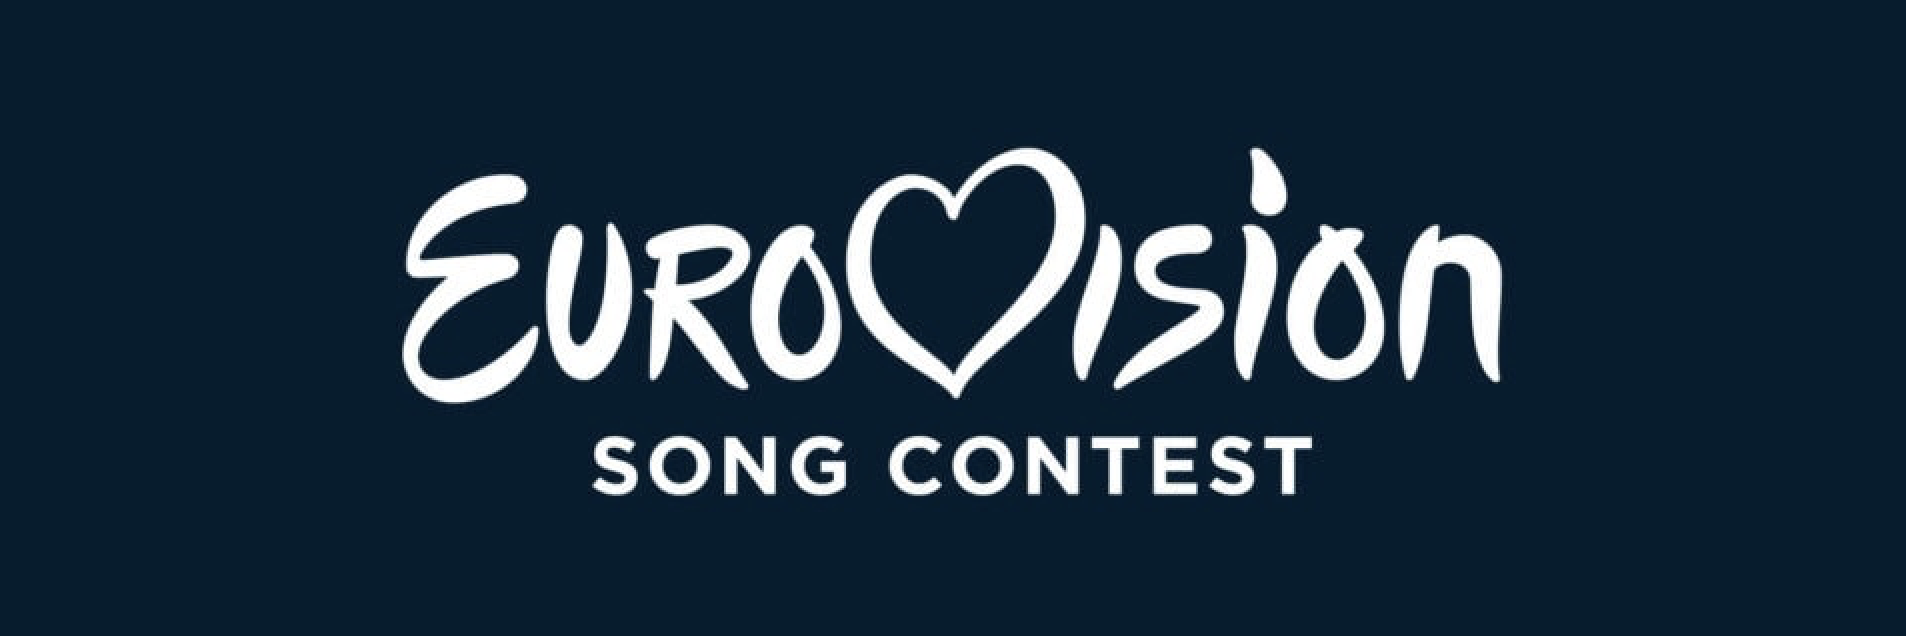

# THE STEPS

- 01 - Getting the Data
- 02 - Basic Preprocessing and understanding data
- 03 - Preprocessing (encoding, feature extraction, dealing will nulls)
- 04 - Exploratory Data Analysis (understanding how metrics affect the number of points and how they are related)
- 05 - Feature Selection (Understanding relation with target variable and with each other with Multicolinearity matrix)
- 06 - Modelling (Comparing various models with  evaluation metrics)
- 07 - Hyperparameter tuning
- 08 - Summary and Conclusions

<div class="alert alert-block alert-info">

**OBJECTIVE:**
- With the given dataset i want to predict who will be the winner of 2010 Eurovision
- I would also like to know the position of all contestants

  
**ASSUMPTIONS:**
- I assume the dataset of 2010 is dataset of a final
- Because the dataset is so small I will assume no outliers

  
**DATA:**
- I first extract the three different datasets (DATA_2010, FINAL_DATA, and SEMIFINAL_DATA)
- Then i do encoding and dummy columns as well as basic preprocessing
- Then i filter this data by the years from 2004-2009 (FINAL_DATA_2004_2009 and SEMIFINAL_DATA_2004_2009) because years before 2004 have a lot of empty columns
- Then i do the exploratory data analysis with the datasets of final and semifinal but with the columns that i want SEMIFINAL_DATA_2004_2009_EDA,FINAL_DATA_2004_2009_EDA
- To see how the semifinal results affect the results in the final i also do a merge MERGED_FINAL_AND_SEMI_EDA. However, this is not useful for the modelling part because for some reason there is data in the finals that is not in the semifinals
- Finally I have the dataset FINAL_DATA_2004_2009_MODEL with the dummiyfyed columns that I want and data from the final
- I then use DATA_2010 to predict the positions



    
**Choosing Model and Tuning:**

- I realise that the model is better at predicting points than the place, so I will predict points and then sort the values
- I will run through various regression models and choose the one with the best R2
- It seems like Randonm Forest Regressor is the winner
- The R2 with Random Forest is 0.68 (has to be improved)

 **Winner:**

- The winner of 2010 Eurovision is Germany
_____________

    
</div>

# 0.0 Coding best practices
Below I am running code to download the relevant libraries and creating the functions to automate the EDA and the basic data cleaning

In [1]:
# Basic Libraries
import os # file management 
import pandas as pd # data manipulatioN
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # advanced statistical visualization
import warnings # warning messages management
#from ydata_profiling import ProfileReport #EDA
import math
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud

#from pandas_profiling import ProfileReport


# Machine Learning
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # label encoding and feature scaling
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import ElasticNet # regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # model evaluation metrics

# Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings


In [2]:
# Basic functions
def data_info(data):
    # Print the DataFrame shape
    print(f"The DataFrame shape for is {data.shape}.\n")
    
    # Print the DataFrame data types and their counts
    print("The DataFrame data types and their counts are:")
    dtypes_counts = data.dtypes.value_counts()
    print(dtypes_counts)
    print()
    
    # Print the count of missing values in each column
    print("Count of missing values per column:")
    missing_values = data.isna().sum().to_frame().rename(columns={0:'count'}).sort_values(by='count', ascending=False)
    print(missing_values[missing_values['count'] > 0])
    
    print("Random sample of the DataFrame:")
    print(data.sample(5))
    
def remove_extra_spaces(data):
    data.columns = data.columns.str.strip()  # This will remove spaces at the beginning and end of column names
    return data


def clean_columns(data):

    # Standardize the column names (lowercase with underscores instead of spaces)
    data.columns = [i.lower().replace(' ', '_') for i in data.columns]

    # Return the updated DataFrame or its column names
    return data



# 01 - Getting the Data
- I first extract the three different datasets (DATA_2010, FINAL_DATA, and SEMIFINAL_DATA)
- Then i do encoding and dummy columns as well as basic preprocessing
- Then i filter this data by the years from 2004-2009 (FINAL_DATA_2004_2009 and SEMIFINAL_DATA_2004_2009)

In [3]:
num_countries_2010 = 39 

In [4]:
# Set parameters

file_path = 'Eurovision Song Contest 2010 dataset.xls'



In [5]:
FINAL_DATA = pd.read_excel(file_path, sheet_name='Final data by year')
SEMIFINAL_DATA = pd.read_excel(file_path, sheet_name='Semi-final data by year')
DATA_2010 = pd.read_excel(file_path, sheet_name='2010 Data')

print("Contents of Sheet 1:")
print(FINAL_DATA)

print("Contents of Sheet 2:")
print(SEMIFINAL_DATA)

print("Contents of Sheet 3:")
print(Data_2010_file_path)

Contents of Sheet 1:
     Year Country                    Region             Song language  \
0    2009  Lithuania  Former Socialist Bloc         English, Russian    
1    2009     Israel            Independent  English, Hebrew, Arabic    
2    2009     France         Western Europe                   French    
3    2009     Sweden            Scandinavia          English, French    
4    2009    Croatia      Former Yugoslavia                 Croatian    
..    ...        ...                    ...                       ...   
286  1998    Finland            Independent                   Finnish   
287  1998     Norway            Scandinavia                 Norwegian   
288  1998    Estonia  Former Socialist Bloc                  Estonian   
289  1998     Turkey            Independent                   Turkish   
290  1998  Macedonia      Former Yugoslavia                Macedonian   

                     Artist                          Song     \
0                   Sasha Son         

NameError: name 'Data_2010_file_path' is not defined

# 02 - Basic preprocessing and understanding Data
- Standardising columns
- Understanding shapes and column types of dataset
- Understanding amount of Null Values
- Checking distribution plots of numeric columns

In [6]:
FINAL_DATA.head(3)

,Year,Country,Region,Song language,Artist,Song,English translation,Artist gender,Group/Solo,Place,Points,Host Country,Host region,Home/Away Country,Home/Away Region,Approximate Betting Prices,Albania,Andorra,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Georgia,Germany,Greece,Hungary,Iceland,Ireland,Israel,Latvia,Lithuania,Macedonia,Malta,Moldova,Monaco,Montenegro,Netherlands,Norway,Poland,Portugal,Romania,Russia,San Marino,Serbia,Serbia & Montenegro,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,2009,Lithuania,Former Socialist Bloc,"English, Russian",Sasha Son,"""Love""",—,Male,Solo,23,23,Russia,Former Socialist Bloc,Away,Home,270.202436,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,7.0,0.0,7.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,2009,Israel,Independent,"English, Hebrew, Arabic",Noa and Mira Awad,"""There Must Be Another Way""",—,Female,Group,16,53,Russia,Former Socialist Bloc,Away,Away,236.309340,0.0,7.0,0.0,NaN,0.0,0.0,8.0,8.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,10.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2009,France,Western Europe,French,Patricia Kaas,"""Et s'il fallait le faire""",And if it had to be done,Female,Solo,8,107,Russia,Former Socialist Bloc,Away,Away,35.841982,2.0,3.0,6.0,NaN,0.0,7.0,1.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,NaN,NaN,3.0,6.0,0.0,6.0,3.0,5.0,5.0,6.0,0.0,0.0,0.0,NaN,1.0,6.0,1.0,0.0,0.0,0.0,10.0,NaN,3.0,NaN,0.0,7.0,3.0,0.0,7.0,0.0,3.0,1.0


In [7]:
SEMIFINAL_DATA.head(3)

,Year,Country,Region,Song language,Artist,Song,English translation,Place,Points,Host country,Host region,Home/Away Country,Home/Away Region,Approximate Betting Prices,Albania,Andorra,Armenia,Austria,Azerbaijan,Belarus,Belgium,Bosnia and Herzegovina,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,France,Georgia,Germany,Greece,Hungary,Iceland,Ireland,Israel,Latvia,Lithuania,Macedonia,Malta,Moldova,Monaco,Montenegro,Netherlands,Norway,Poland,Portugal,Romania,Russia,San Marino,Serbia,Serbia & Montenegro,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom
0,2009 SF1,Montenegro,Former Yugoslavia,English,Andrea Demirović,"""Just Get Out of My Life""",—,11,44,Russia,Former Socialist Bloc,Away,Away,65.054679,NaN,1.0,5.0,NaN,NaN,3.0,0.0,10.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,5.0,NaN,0.0
1,2009 SF1,Czech Republic,Former Socialist Bloc,"English, Romani",Gipsy.cz,"""Aven Romale""",Come in gypsies,18,0,Russia,Former Socialist Bloc,Away,Home,726.428529,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
2,2009 SF1,Belgium,Western Europe,English,Patrick Ouchène,"""Copycat""",—,17,1,Russia,Former Socialist Bloc,Away,Away,116.232571,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0


In [8]:
DATA_2010.head(3)

,Year,Country,Region,Song language,Artist,Song,English translation,Artist gender,Group/Solo,Place,Points,Host Country,Host region,Home/Away Country,Home/Away Region,Approximate Betting Prices
0,2010,Moldova,Former Socialist Bloc,English,SunStroke Project and Olia Tira,"""Run Away""",—,Both,Group,NaN,NaN,Norway,Scandinavia,Away,Away,94.266667
1,2010,Russia,Former Socialist Bloc,English,Peter Nalitch Band,"""Lost and Forgotten""",—,Male,Group,NaN,NaN,Norway,Scandinavia,Away,Away,95.866667
2,2010,Estonia,Former Socialist Bloc,English,Malcolm Lincoln and Manpower 4,"""Siren""",—,Male,Group,NaN,NaN,Norway,Scandinavia,Away,Away,127.666667


In [9]:
ALL_datasets = [FINAL_DATA,SEMIFINAL_DATA,DATA_2010]

In [10]:
for data in ALL_datasets:
    print(data.columns)

Index(['Year', 'Country   ', 'Region', 'Song language', 'Artist   ', 'Song   ',
       'English translation ', 'Artist gender', 'Group/Solo', 'Place',
       'Points', 'Host Country', 'Host region', 'Home/Away Country',
       'Home/Away Region', 'Approximate Betting Prices', 'Albania ',
       'Andorra ', 'Armenia ', 'Austria', 'Azerbaijan ', 'Belarus ',
       'Belgium ', 'Bosnia and Herzegovina ', 'Bulgaria ', 'Croatia ',
       'Cyprus ', 'Czech Republic ', 'Denmark ', 'Estonia ', 'Finland ',
       'France ', 'Georgia', 'Germany ', 'Greece ', 'Hungary ', 'Iceland ',
       'Ireland ', 'Israel ', 'Latvia ', 'Lithuania ', 'Macedonia ', 'Malta ',
       'Moldova ', 'Monaco', 'Montenegro ', 'Netherlands ', 'Norway ',
       'Poland ', 'Portugal ', 'Romania ', 'Russia ', 'San Marino', 'Serbia ',
       'Serbia & Montenegro', 'Slovakia ', 'Slovenia ', 'Spain ', 'Sweden ',
       'Switzerland ', 'Turkey ', 'Ukraine ', 'United Kingdom '],
      dtype='object')
Index(['Year', 'Country  ', 

In [11]:
for data in ALL_datasets:
    remove_extra_spaces(data)
    clean_columns(data)

In [12]:
ALL_datasets = [FINAL_DATA,SEMIFINAL_DATA,DATA_2010]
training_datasets = [FINAL_DATA,SEMIFINAL_DATA]

for data in ALL_datasets:
    data_info(data)

The DataFrame shape for is (291, 63).

The DataFrame data types and their counts are:
float64    48
object     13
int64       2
Name: count, dtype: int64

Count of missing values per column:
                            count
san_marino                    266
georgia                       244
azerbaijan                    243
slovakia                      242
serbia_&_montenegro           221
monaco                        219
serbia                        219
montenegro                    217
czech_republic                217
armenia                       197
moldova                       173
hungary                       171
bulgaria                      170
albania                       149
belarus                       146
group/solo                    145
artist_gender                 145
approximate_betting_prices    145
andorra                       145
austria                       127
ukraine                       126
lithuania                      81
macedonia                  

<div class="alert alert-block alert-info">
    
**First impression of data:**
    
_____________

   -  Semifinal and final datasets have differences: Final has columns Artist/Gender, and Group/Solo but Semifinal doesn´t
     
   -  All data in Final should be in Semifinal, but it is not the case. Do some countries directly qualify?
     
**FINAL_DATA**: 

   -  Semifinal and final datasets have differences: Final has columns Artist/Gender, and Group/Solo but Semifinal doesn´t
     
   -  All data in Final should be in Semifinal, but it is not the case. Do some countries directly qualify?
    
   - Aside from the country columns that have Nan Values, the columns "Artist Gender", "Approximate Betting Prices" and "Group/Solo" also have Nan Values, which shouldn´t be the case.
    
   - I assume that countries can´t vote 0 so I will fill the Nan values with 0, to show that this country hasn´t voted. 
    
   - When the English translation is "--" this means, that the title is in English
    
_____________
   
    
**SEMIFINAL_DATA**: 
    
   - Doesn´t contain "Artist Gender" or Group/Solo
   - Year column needs to be split to only contain Year

_____________
    
 **2010_DATA**: 
 - Place and Points data are empty, these are the columns to be predicted
 - English translation "?" needs to be formatted
 - I assume this is data from the final
 - Betting points, home/away country and region and english will probably be the main features for the final
   
</div>

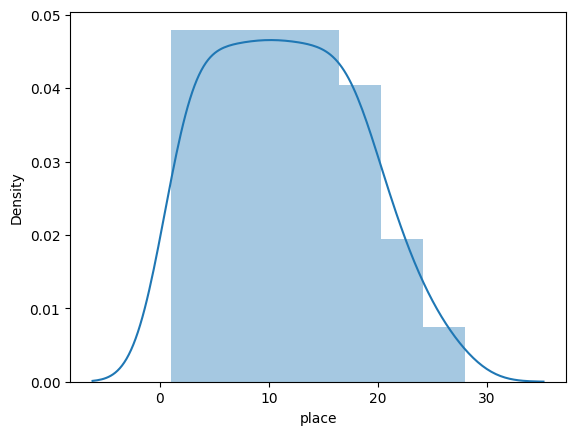

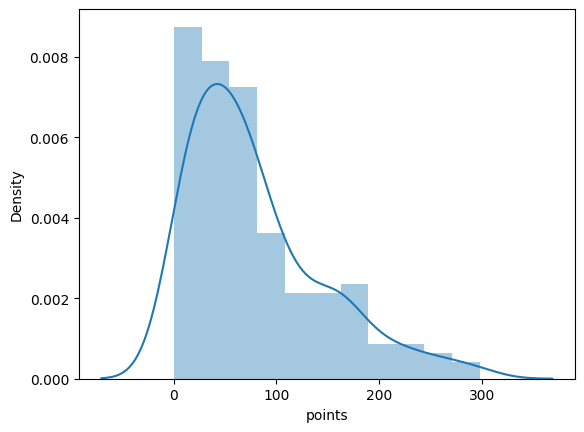

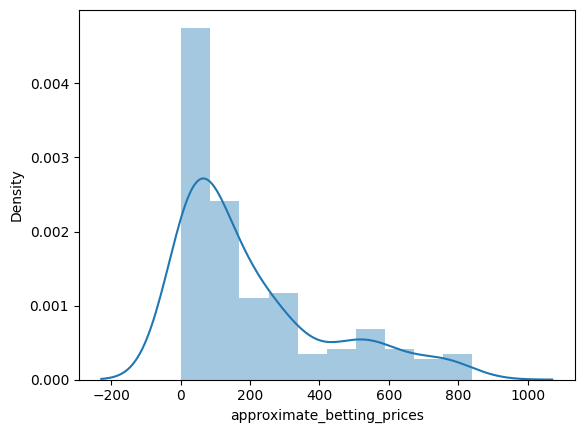

In [13]:
#SEMIFINAL data with only numeric values to check distributions

desired_columns_SF = SEMIFINAL_DATA.loc[:, :SEMIFINAL_DATA.columns[SEMIFINAL_DATA.columns.get_loc('albania') - 1]]
num = desired_columns_SF.select_dtypes(np.number)


num.head()

for column in num.columns:
    sns.distplot(desired_columns_SF[column])
    plt.show()

In [14]:
SEMIFINAL_DATA.dtypes

year               object
country            object
region             object
song_language      object
artist             object
                   ...   
sweden            float64
switzerland       float64
turkey            float64
ukraine           float64
united_kingdom    float64
Length: 61, dtype: object

# 03 - Preprocessing
- Changing column types
- Dealing with Null values
- Dummyfying and encoding columns
- Bucketing
- Getting Data ready for model later on

In [15]:
def convert_to_float(value):
    if isinstance(value, str) and '\ufeff' in value:
        return float(value.replace('\ufeff', ''))
    return value

In [16]:

FINAL_DATA["place"] = FINAL_DATA["place"].apply(convert_to_float)
SEMIFINAL_DATA["place"] = FINAL_DATA["place"].apply(convert_to_float)
FINAL_DATA['approximate_betting_prices'] = pd.to_numeric(FINAL_DATA['approximate_betting_prices'], errors='coerce')
SEMIFINAL_DATA['approximate_betting_prices'] = pd.to_numeric(SEMIFINAL_DATA['approximate_betting_prices'], errors='coerce')
FINAL_DATA["year"]= FINAL_DATA["year"].astype("string")
FINAL_DATA['year'] = FINAL_DATA['year'].str.strip()



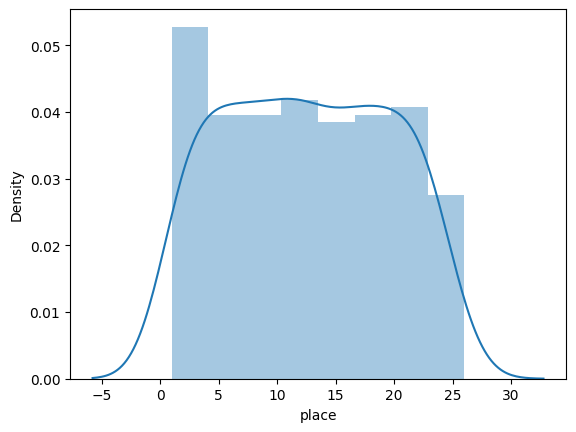

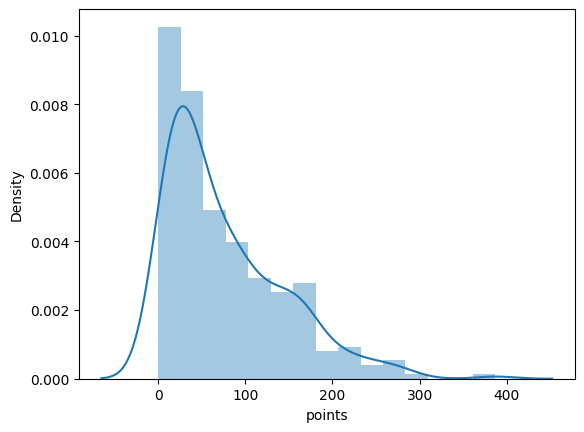

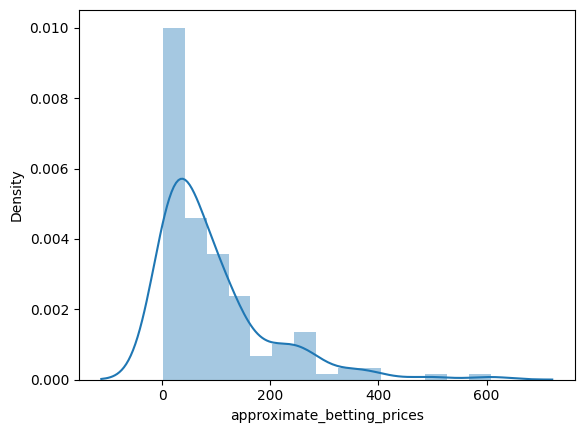

In [18]:
#FINAL  data with only numeric values to check distributions

desired_columns_F = FINAL_DATA.loc[:, :FINAL_DATA.columns[FINAL_DATA.columns.get_loc('albania')-1]]
num = desired_columns_F.select_dtypes(np.number)


num.head()

for column in num.columns:
    sns.distplot(desired_columns_F[column])
    plt.show()

In [19]:
### Filling empty values from Albania onwards with 0
for data in training_datasets:
    countries_columns = data.columns[data.columns.get_loc('albania'):]
    data[countries_columns] = data[countries_columns].fillna(0)

In [20]:
countries_columns_SF = SEMIFINAL_DATA.columns[SEMIFINAL_DATA.columns.get_loc('albania'):]
countries_columns_F = SEMIFINAL_DATA.columns[FINAL_DATA.columns.get_loc('albania'):]

In [21]:
SEMIFINAL_DATA.columns

Index(['year', 'country', 'region', 'song_language', 'artist', 'song',
       'english_translation', 'place', 'points', 'host_country', 'host_region',
       'home/away_country', 'home/away_region', 'approximate_betting_prices',
       'albania', 'andorra', 'armenia', 'austria', 'azerbaijan', 'belarus',
       'belgium', 'bosnia_and_herzegovina', 'bulgaria', 'croatia', 'cyprus',
       'czech_republic', 'denmark', 'estonia', 'finland', 'france', 'georgia',
       'germany', 'greece', 'hungary', 'iceland', 'ireland', 'israel',
       'latvia', 'lithuania', 'macedonia', 'malta', 'moldova', 'monaco',
       'montenegro', 'netherlands', 'norway', 'poland', 'portugal', 'romania',
       'russia', 'san_marino', 'serbia', 'serbia_&_montenegro', 'slovakia',
       'slovenia', 'spain', 'sweden', 'switzerland', 'turkey', 'ukraine',
       'united_kingdom'],
      dtype='object')

In [22]:

#Preprocessing Semifinal data
SEMIFINAL_DATA.rename(columns={'year': 'year_and_round'}, inplace=True)
SEMIFINAL_DATA[['year', 'round']] = SEMIFINAL_DATA['year_and_round'].str.split(' ', n=1, expand=True)

#SEMIFINAL_DATA['Num_Voting_Countries'] = (SEMIFINAL_DATA[countries_columns_SF] > 0).sum(axis=1)
#SEMIFINAL_DATA['Points_norm'] = SEMIFINAL_DATA['Points']/SEMIFINAL_DATA['Num_Voting_Countries']
SEMIFINAL_DATA['semifinal_top_10'] = [None if math.isnan(i) else 1 if i<=10 else 0 for i in SEMIFINAL_DATA['place']]
SEMIFINAL_DATA['semi_draw_group'] = [None if i=='-' or i is None else '1. 1-5' if float(i)<=5 else '2. 6-10' if float(i)<=10 else '3. 11-15' if float(i)<=15 else '4. 16+' for i in SEMIFINAL_DATA['place']]
SEMIFINAL_DATA['semi_draw_half'] = [None if i=='-' or i is None else '1. 1-5' if float(i)<=5 else '2. 6-10' if float(i)<=10 else '3. 11-15' if float(i)<=15 else '4. 15-20' if float(i)<=20 else '5. 21+' for i in SEMIFINAL_DATA['place']]
SEMIFINAL_DATA['english_10']= [1 if 'English' in i else 0 for i in SEMIFINAL_DATA['song_language']]
SEMIFINAL_DATA['english_title_10'] = FINAL_DATA['english_translation'].apply(lambda x: 0 if any(c.isalpha() for c in x) else 1)
SEMIFINAL_DATA['betting_groups'] = [None if i=='-' or i is None else '1. 1-10' if float(i)<=10 else '2. 11-50' if float(i)<=50 else '3. 51-150' if float(i)<=150 else '4. 150+' for i in SEMIFINAL_DATA['approximate_betting_prices']]
SEMIFINAL_DATA['home_country_10'] =[1 if i=='Home' else 0 for i in SEMIFINAL_DATA['home/away_country']]
SEMIFINAL_DATA['away_country_10'] =[1 if i=='Away' else 0 for i in SEMIFINAL_DATA['home/away_country']]
SEMIFINAL_DATA['home_region_10'] =[1 if i=='Home' else 0 for i in SEMIFINAL_DATA['home/away_region']]
SEMIFINAL_DATA['away_region_10'] =[1 if i=='Away' else 0 for i in SEMIFINAL_DATA['home/away_region']]

#Preprocessing Final data

#FINAL_DATA['Num_Voting_Countries'] = (FINAL_DATA[countries_columns_F] > 0).sum(axis=1)
#FINAL_DATA['Points_norm'] = FINAL_DATA['Points']/FINAL_DATA['Num_Voting_Countries']
FINAL_DATA['final_top_10'] = [None if math.isnan(i) else 1 if i<=10 else 0 for i in FINAL_DATA['place']]
FINAL_DATA['final_draw_group'] = [None if i=='-' or i is None else '1. 1-5' if float(i)<=5 else '2. 6-10' if float(i)<=10 else '3. 11-15' if float(i)<=15 else '4. 16+' for i in FINAL_DATA['place']]
FINAL_DATA['final_draw_half'] = [None if i=='-' or i is None else '1. 1-5' if float(i)<=5 else '2. 6-10' if float(i)<=10 else '3. 11-15' if float(i)<=15 else '4. 15-20' if float(i)<=20 else '5. 21+' for i in FINAL_DATA['place']]
FINAL_DATA['english_10']= [1 if 'English' in i else 0 for i in FINAL_DATA['song_language']]
FINAL_DATA['english_title_10'] = FINAL_DATA['english_translation'].apply(lambda x: 0 if any(c.isalpha() for c in x) else 1)
FINAL_DATA['betting_groups'] = [None if i=='-' or i is None else '1. 1-10' if float(i)<=10 else '2. 11-50' if float(i)<=50 else '3. 51-150' if float(i)<=150 else '4. 150+' for i in FINAL_DATA['approximate_betting_prices']]
FINAL_DATA['home_country_10'] =[1 if i=='Home' else 0 for i in FINAL_DATA['home/away_country']]
FINAL_DATA['away_country_10'] =[1 if i=='Away' else 0 for i in FINAL_DATA['home/away_country']]
FINAL_DATA['home_region_10'] =[1 if i=='Home' else 0 for i in FINAL_DATA['home/away_region']]
FINAL_DATA['away_region_10'] =[1 if i=='Away' else 0 for i in FINAL_DATA['home/away_region']]
FINAL_DATA['round'] = "F"
FINAL_DATA['betting_groups_1_10'] = [ 1 if i =='1. 1-10'else 0 for i in FINAL_DATA['betting_groups']]
FINAL_DATA['betting_groups_2_10'] = [ 1 if i =='2. 11-50'else 0 for i in FINAL_DATA['betting_groups']]
FINAL_DATA['betting_groups_3_10'] = [ 1 if i =='3. 51-150'else 0 for i in FINAL_DATA['betting_groups']]
FINAL_DATA['betting_groups_4_10'] = [ 1 if i =='4. 150+'else 0 for i in FINAL_DATA['betting_groups']]



#NEW COLUMNS that are not in semi final
FINAL_DATA['artist_gender'] =['—' if i is None else i for i in FINAL_DATA['artist_gender']]
FINAL_DATA['group/solo'] =['—' if i is None else i for i in FINAL_DATA['group/solo']]
FINAL_DATA['male_10'] =[1 if i=='Male' else 0 for i in FINAL_DATA['artist_gender']]
FINAL_DATA['female_10'] =[1 if i=='Female' else 0 for i in FINAL_DATA['artist_gender']]
FINAL_DATA['both_10'] =[1 if i=='Both' else 0 for i in FINAL_DATA['artist_gender']]
FINAL_DATA['group_10'] =[1 if i=='Group' else 0 for i in FINAL_DATA['group/solo']]
FINAL_DATA['solo_10'] =[1 if i=='Solo' else 0 for i in FINAL_DATA['group/solo']]

#Preprocessing 2010 data
DATA_2010['english_10']= [1 if 'English' in i else 0 for i in DATA_2010['song_language']]
DATA_2010['english_title_10'] = DATA_2010['english_translation'].apply(lambda x: 0 if any(c.isalpha() for c in x) else 1)
DATA_2010['betting_groups'] = [None if i=='-' or i is None else '1. 1-10' if float(i)<=10 else '2. 11-50' if float(i)<=50 else '3. 51-150' if float(i)<=150 else '4. 150+' for i in DATA_2010['approximate_betting_prices']]
DATA_2010['betting_groups_1_10'] = [ 1 if i =='1. 1-10'else 0 for i in DATA_2010['betting_groups']]
DATA_2010['betting_groups_2_10'] = [ 1 if i =='2. 11-50'else 0 for i in DATA_2010['betting_groups']]
DATA_2010['betting_groups_3_10'] = [ 1 if i =='3. 51-150'else 0 for i in DATA_2010['betting_groups']]
DATA_2010['betting_groups_4_10'] = [ 1 if i =='4. 150+'else 0 for i in DATA_2010['betting_groups']]
DATA_2010['home_country_10'] =[1 if i=='Home' else 0 for i in DATA_2010['home/away_country']]
DATA_2010['away_country_10'] =[1 if i=='Away' else 0 for i in DATA_2010['home/away_country']]
DATA_2010['home_region_10'] =[1 if i=='Home' else 0 for i in DATA_2010['home/away_region']]
DATA_2010['away_region_10'] =[1 if i=='Away' else 0 for i in DATA_2010['home/away_region']]

DATA_2010['male_10'] =[1 if i=='Male' else 0 for i in DATA_2010['artist_gender']]
DATA_2010['female_10'] =[1 if i=='Female' else 0 for i in DATA_2010['artist_gender']]
DATA_2010['both_10'] =[1 if i=='Both' else 0 for i in DATA_2010['artist_gender']]
DATA_2010['group_10'] =[1 if i=='Group' else 0 for i in DATA_2010['group/solo']]
DATA_2010['solo_10'] =[1 if i=='Solo' else 0 for i in DATA_2010['group/solo']]





# 04- Exploratory Data Analysis
- I first filter data from 2004 to 2009 for EDA because there are a lot of Nans and inconsistencies in other years
- Then i only take the columns I want for the EDA ( I mainly take out the country columns)
- Then considering Semifinal and final data separately I analyse what metrics affect the number of points scored
- Then I merge Semifinal and Final to see how the results in the semifinal affect the success in the final

In [23]:
desired_years = ["2004", "2005","2006", "2007", "2008", "2009"]

In [24]:
FINAL_DATA_2004_2009 = FINAL_DATA[FINAL_DATA['year'].isin(desired_years)]
SEMIFINAL_DATA_2004_2009 = SEMIFINAL_DATA[SEMIFINAL_DATA['year'].isin(desired_years)]


In [25]:
FINAL_DATA_2004_2009.columns

Index(['year', 'country', 'region', 'song_language', 'artist', 'song',
       'english_translation', 'artist_gender', 'group/solo', 'place', 'points',
       'host_country', 'host_region', 'home/away_country', 'home/away_region',
       'approximate_betting_prices', 'albania', 'andorra', 'armenia',
       'austria', 'azerbaijan', 'belarus', 'belgium', 'bosnia_and_herzegovina',
       'bulgaria', 'croatia', 'cyprus', 'czech_republic', 'denmark', 'estonia',
       'finland', 'france', 'georgia', 'germany', 'greece', 'hungary',
       'iceland', 'ireland', 'israel', 'latvia', 'lithuania', 'macedonia',
       'malta', 'moldova', 'monaco', 'montenegro', 'netherlands', 'norway',
       'poland', 'portugal', 'romania', 'russia', 'san_marino', 'serbia',
       'serbia_&_montenegro', 'slovakia', 'slovenia', 'spain', 'sweden',
       'switzerland', 'turkey', 'ukraine', 'united_kingdom', 'final_top_10',
       'final_draw_group', 'final_draw_half', 'english_10', 'english_title_10',
       'bettin

In [26]:
semi_final_columns_for_eda = ['year','round', 'country', 'region', 'song_language', 'artist',
       'song', 'english_translation', 'place', 'points', 'host_country',
       'host_region', 'home/away_country', 'home/away_region',
       'approximate_betting_prices','semifinal_top_10', 'semi_draw_group', 'semi_draw_half', 'english_10',
       'english_title_10', 'betting_groups', 'round']

SEMIFINAL_DATA_2004_2009_EDA = SEMIFINAL_DATA_2004_2009[semi_final_columns_for_eda]

final_columns_for_eda = ['year','round', 'country', 'region', 'song_language', 'artist', 'song',
       'english_translation', 'artist_gender', 'group/solo', 'place', 'points',
       'host_country', 'host_region', 'home/away_country', 'home/away_region',
       'approximate_betting_prices', 'final_top_10',
       'final_draw_group', 'final_draw_half', 'english_10', 'english_title_10',
       'betting_groups']

FINAL_DATA_2004_2009_EDA = FINAL_DATA_2004_2009[final_columns_for_eda]

In [27]:
FINAL_DATA_2004_2009_EDA.head(2)

,year,round,country,region,song_language,artist,song,english_translation,artist_gender,group/solo,place,points,host_country,host_region,home/away_country,home/away_region,approximate_betting_prices,final_top_10,final_draw_group,final_draw_half,english_10,english_title_10,betting_groups
0,2009,F,Lithuania,Former Socialist Bloc,"English, Russian",Sasha Son,"""Love""",—,Male,Solo,23.0,23,Russia,Former Socialist Bloc,Away,Home,270.202436,0,4. 16+,5. 21+,1,1,4. 150+
1,2009,F,Israel,Independent,"English, Hebrew, Arabic",Noa and Mira Awad,"""There Must Be Another Way""",—,Female,Group,16.0,53,Russia,Former Socialist Bloc,Away,Away,236.309340,0,4. 16+,4. 15-20,1,1,4. 150+


In [28]:
SEMIFINAL_DATA_2004_2009_EDA.head(2)

,year,round,country,region,song_language,artist,song,english_translation,place,points,host_country,host_region,home/away_country,home/away_region,approximate_betting_prices,semifinal_top_10,semi_draw_group,semi_draw_half,english_10,english_title_10,betting_groups,round
0,2009,SF1,Montenegro,Former Yugoslavia,English,Andrea Demirović,"""Just Get Out of My Life""",—,23.0,44,Russia,Former Socialist Bloc,Away,Away,65.054679,0,4. 16+,5. 21+,1,1,3. 51-150,SF1
1,2009,SF1,Czech Republic,Former Socialist Bloc,"English, Romani",Gipsy.cz,"""Aven Romale""",Come in gypsies,16.0,0,Russia,Former Socialist Bloc,Away,Home,726.428529,0,4. 16+,4. 15-20,1,1,4. 150+,SF1


In [29]:
categorical_columns_SF = ['english_10', 'region','semi_draw_group','semi_draw_half',
                       'host_country','home/away_country','home/away_region','english_10',
                       'english_title_10','betting_groups', 'year']


categorical_columns_F = ['english_10', 'region','artist_gender', 'group/solo',
                       'host_country','home/away_country','home/away_region','english_10',
                       'english_title_10','betting_groups','year']



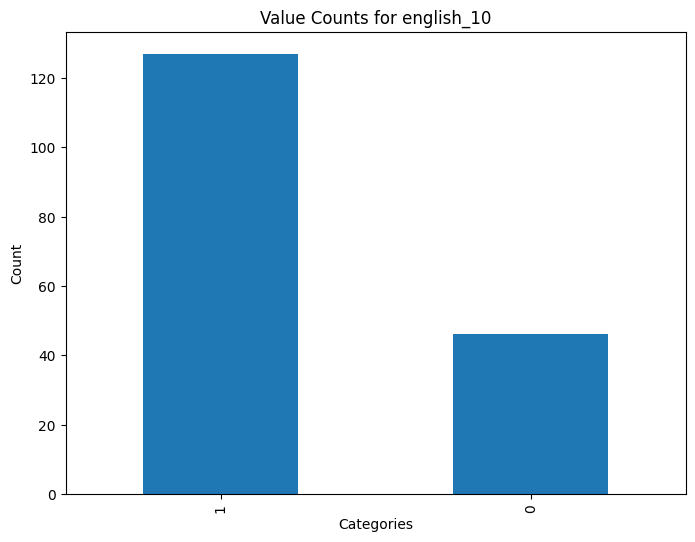

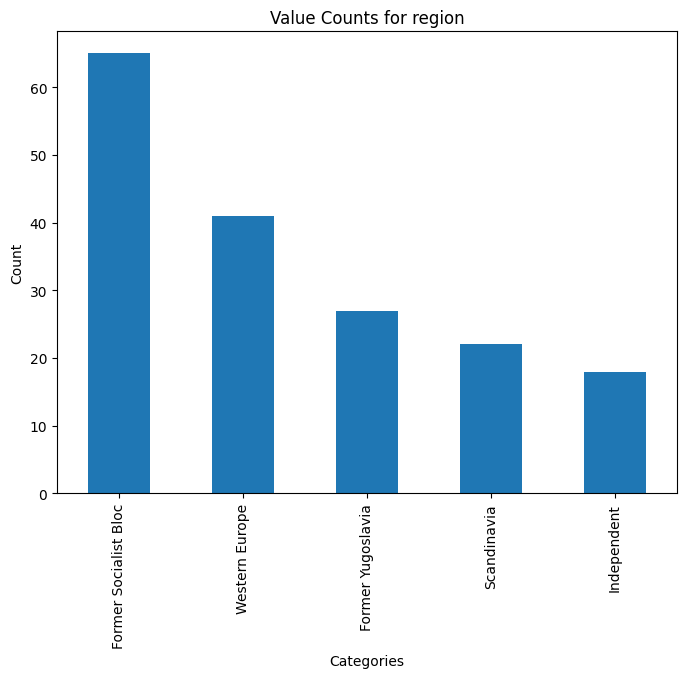

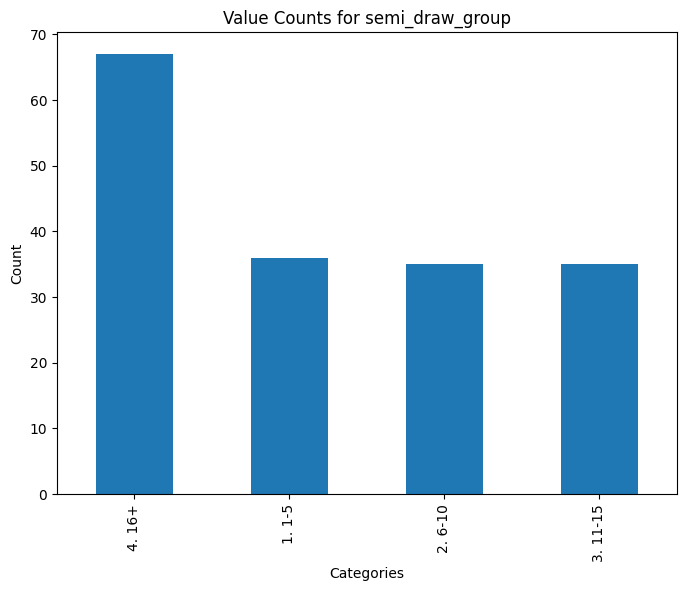

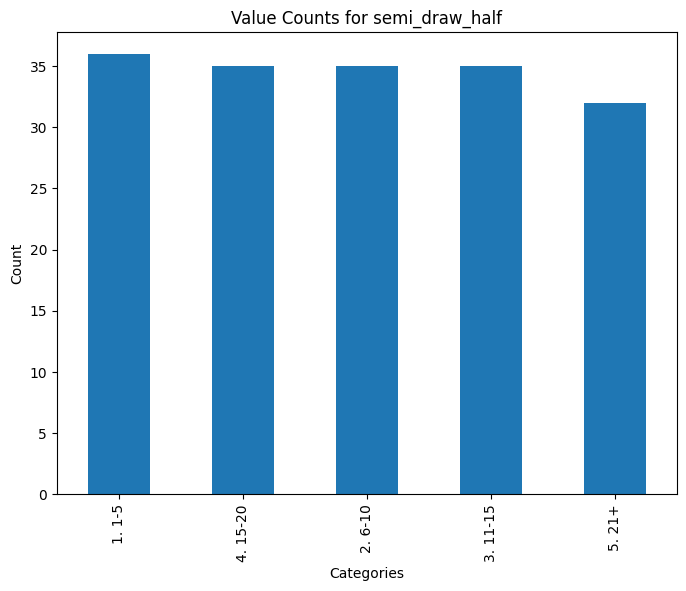

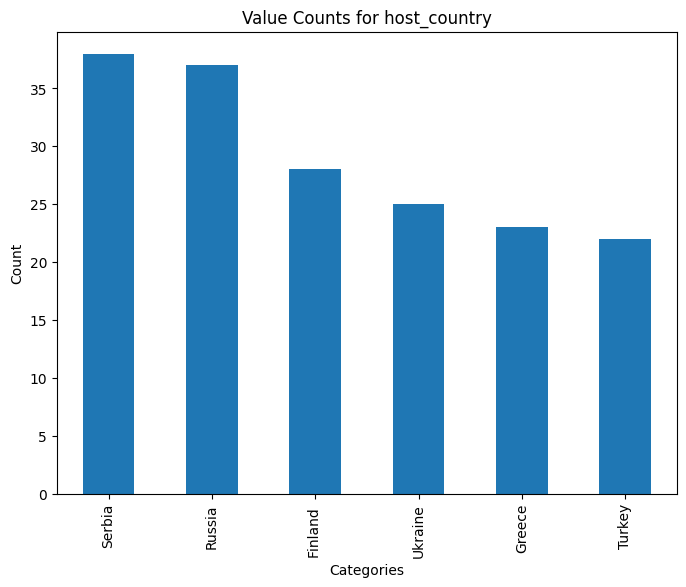

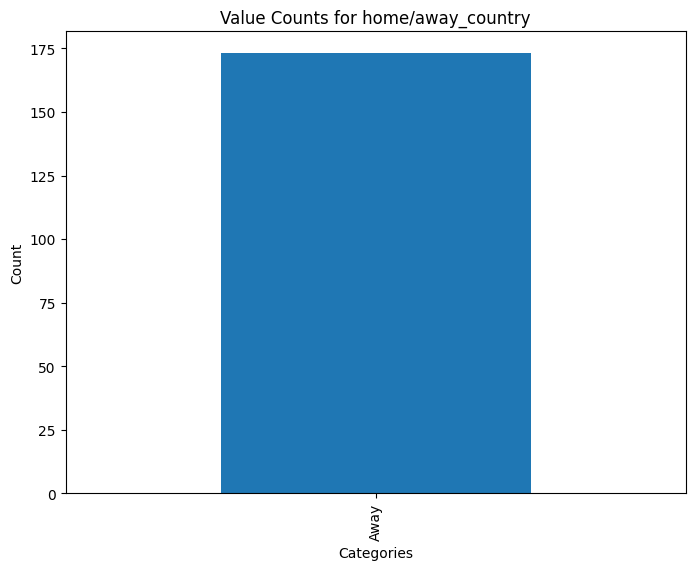

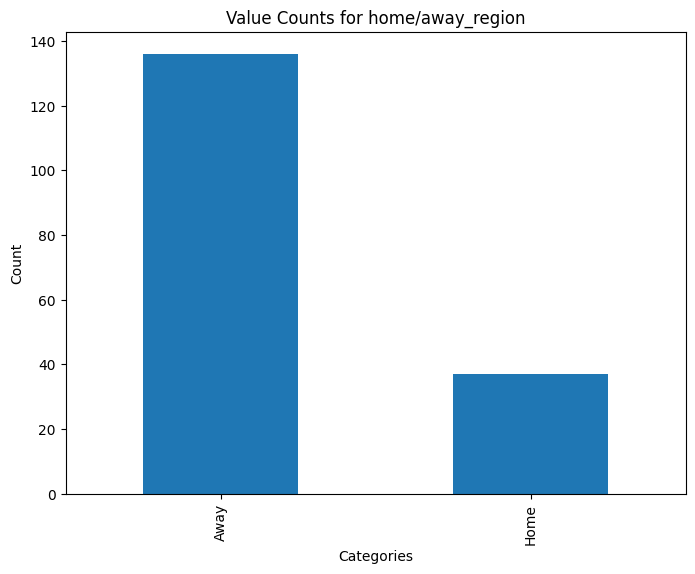

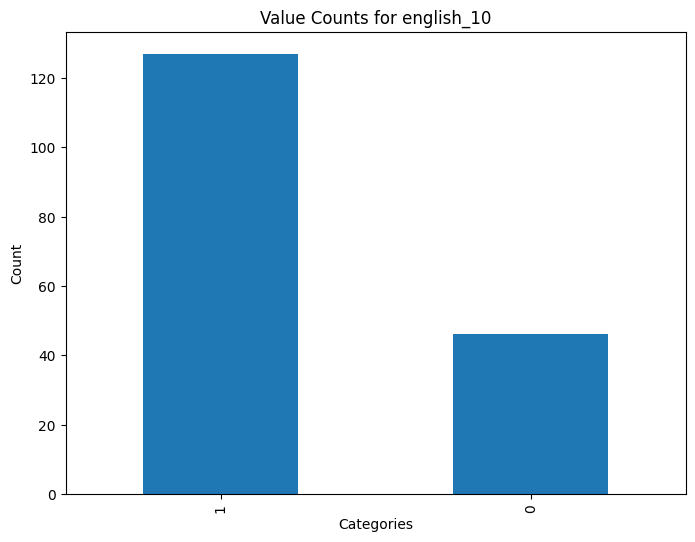

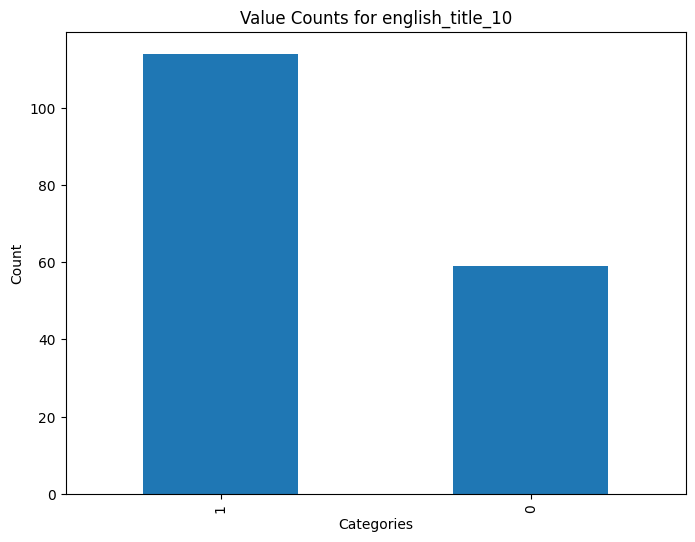

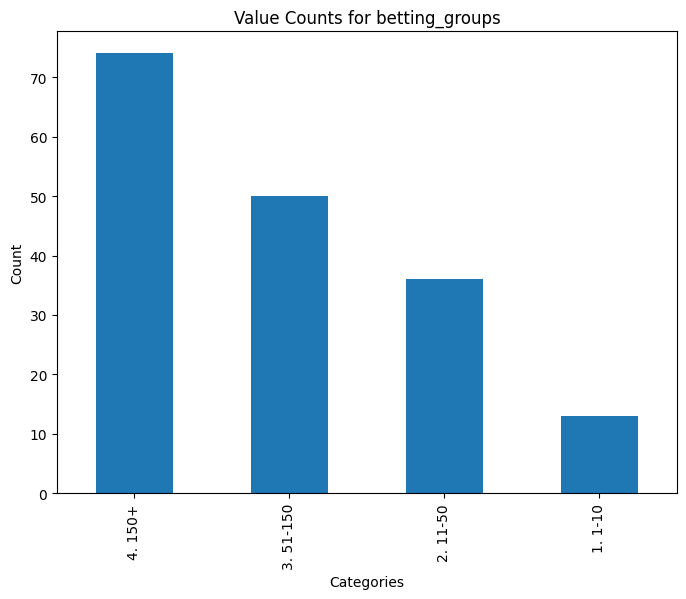

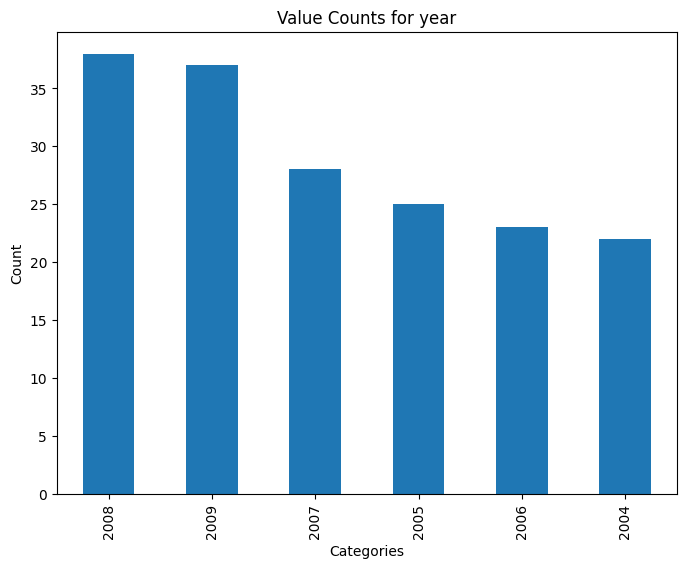

In [30]:
for column in categorical_columns_SF: # Checking if the column contains categorical data
        value_counts = SEMIFINAL_DATA_2004_2009_EDA[column].value_counts()
        plt.figure(figsize=(8, 6))
        value_counts.plot(kind='bar')
        plt.title(f'Value Counts for {column}')
        plt.xlabel('Categories')
        plt.ylabel('Count')
        plt.show()

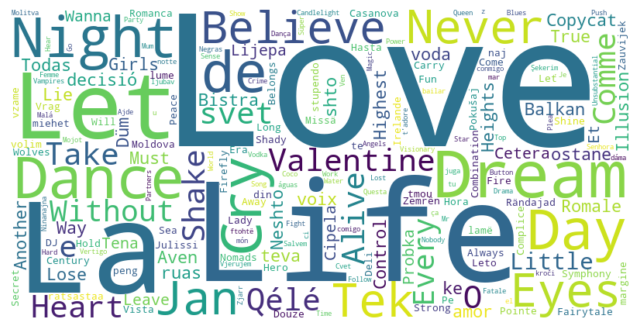

In [31]:
text_data = ' '.join(SEMIFINAL_DATA_2004_2009_EDA['song'])  
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<div class="alert alert-block alert-warning"style="font-size: 17px;">
    
<h4>SEMI_FINAL EDA 1 CONCLUSIONS</h4>
--------------

* The Contest is mostly held in Former Socialist Bloc. Serbia and Russia being the ones that host the most
* The word that appears most in the Semifinals song titles is Love
* All countries perform in Away country.
* Love,Dream, Dance,Life are some of the most repeated words in the semifinals song titles
* Some countries  perform in Home region but most in Away region.
* Most songs at least contain English
* Most Song titles are in English
* Betting groups are  distributed increasingly , with the least value counts in the group 1-10

    

</div>

- I will now separate by round and year in Semifinal Data

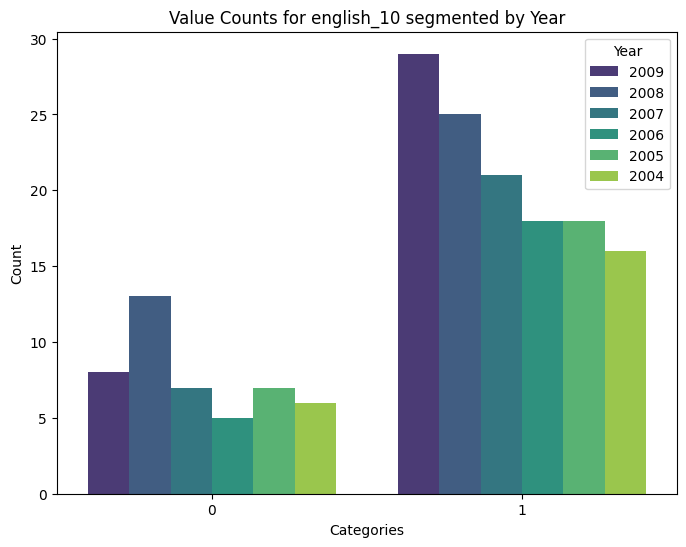

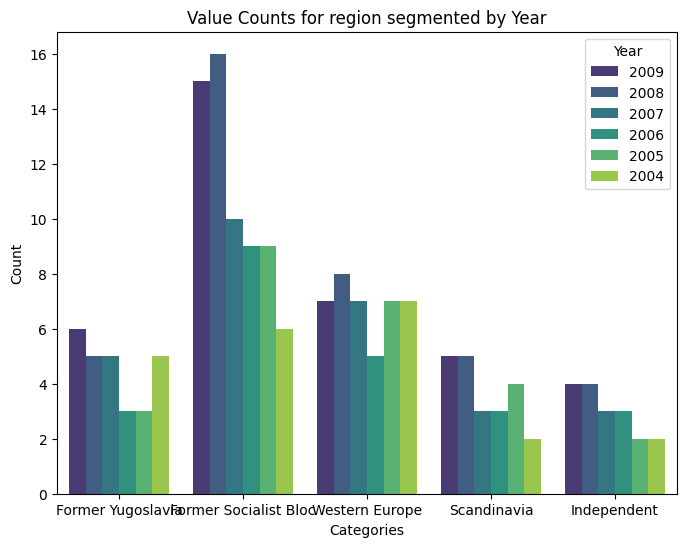

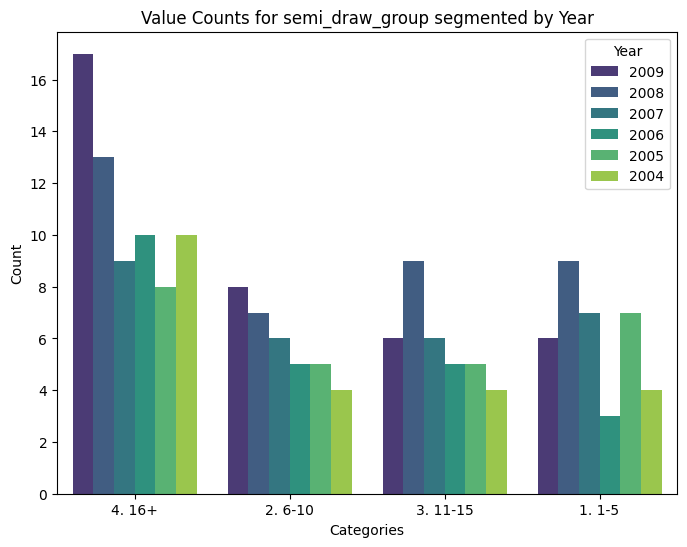

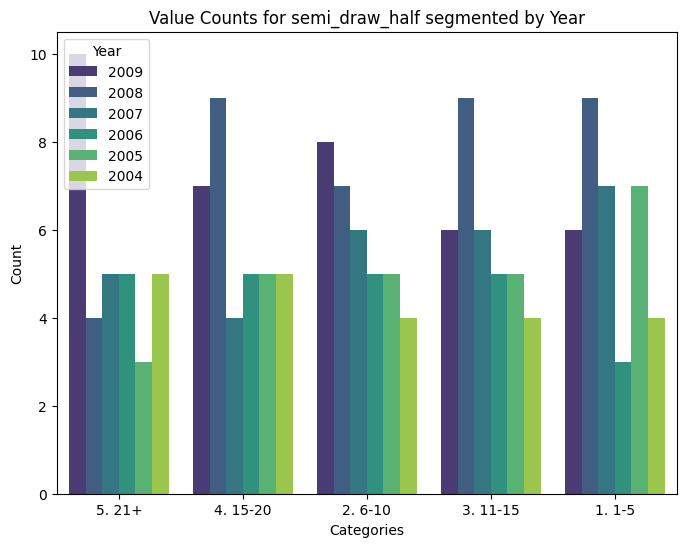

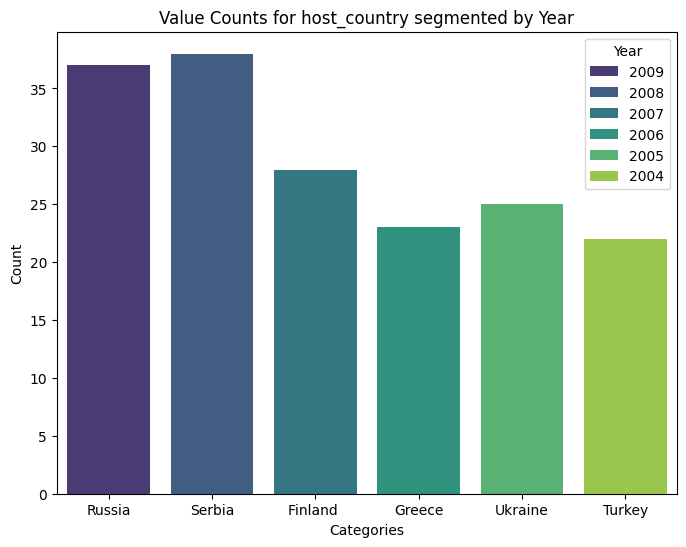

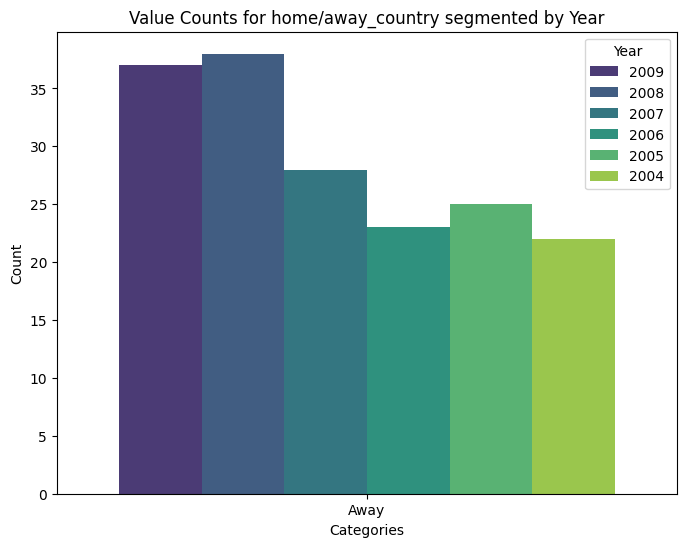

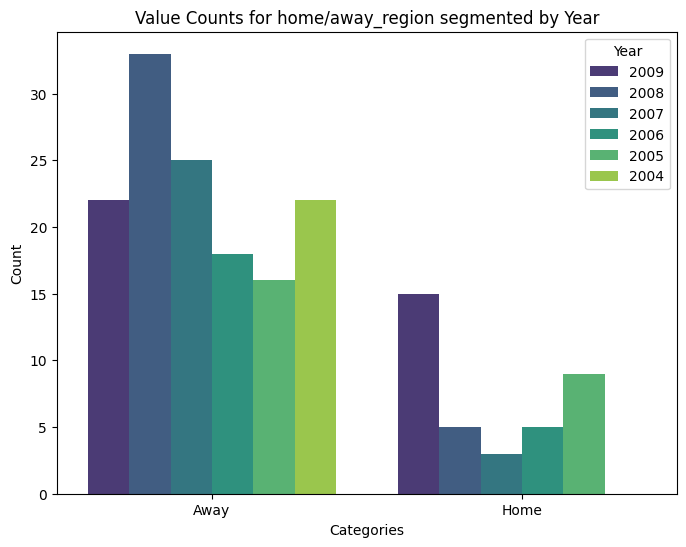

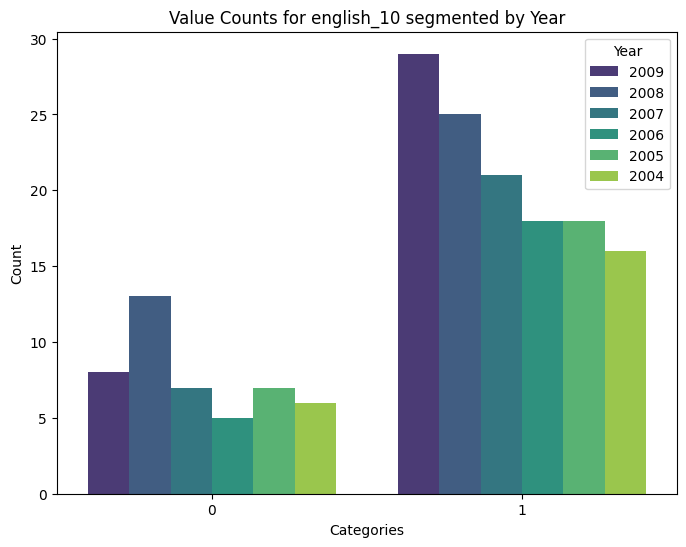

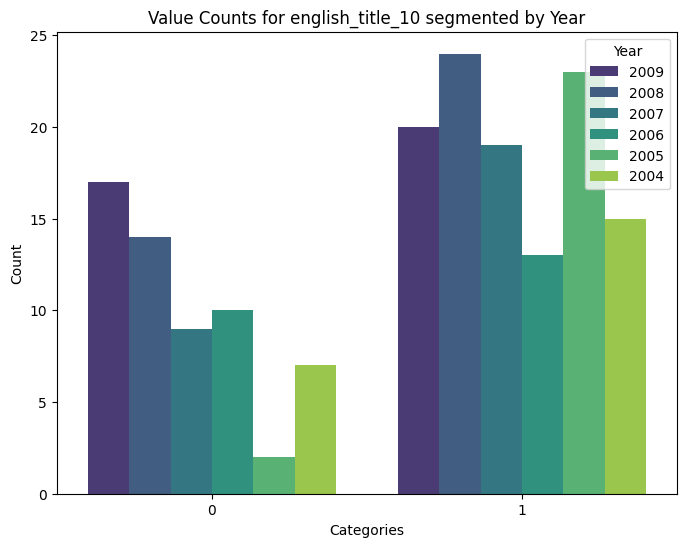

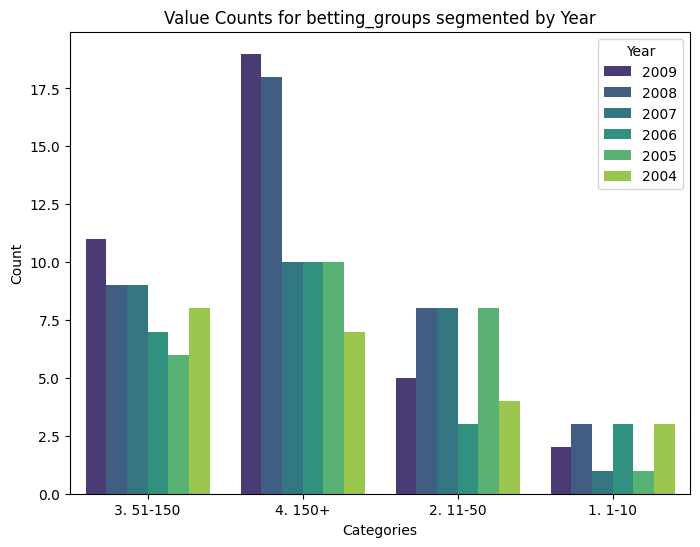

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


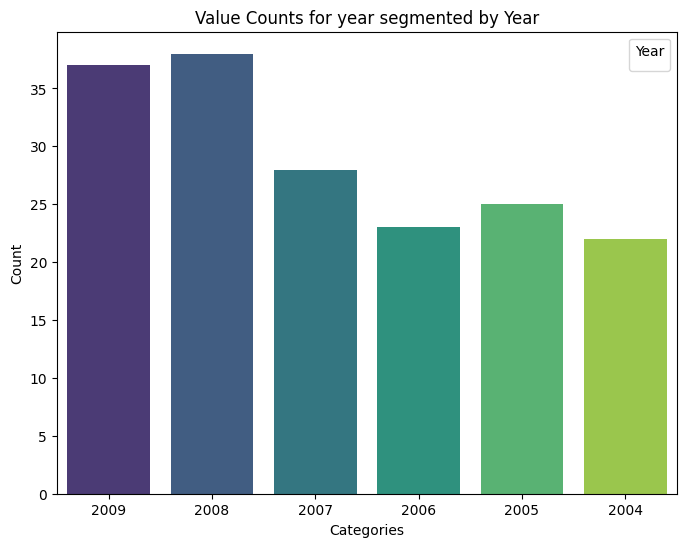

In [32]:
for column in categorical_columns_SF:  # Loop through categorical columns
    plt.figure(figsize=(8, 6))
    sns.countplot(data=SEMIFINAL_DATA_2004_2009, x=column, hue='year', palette='viridis')
    plt.title(f'Value Counts for {column} segmented by Year')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.legend(title='Year')
    plt.show()

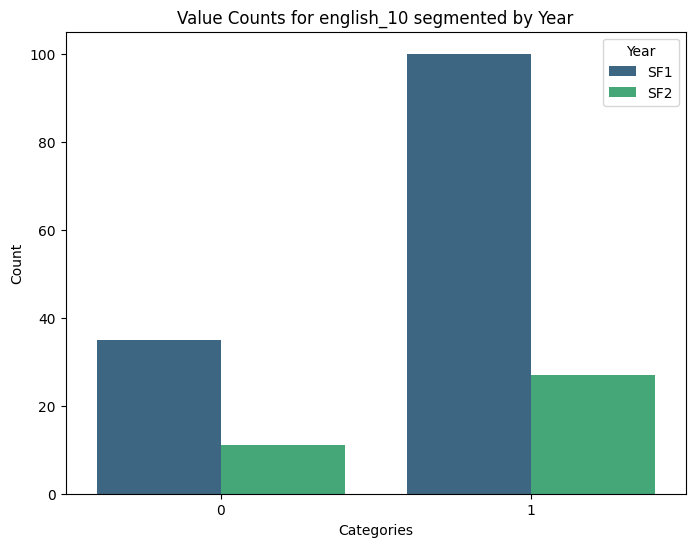

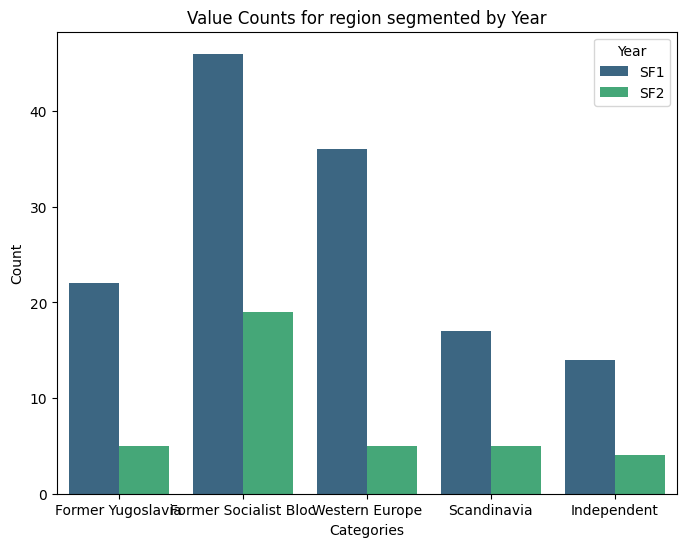

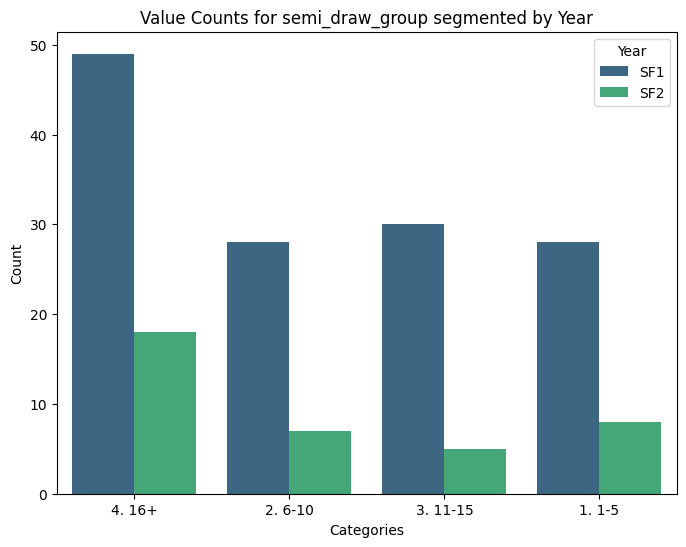

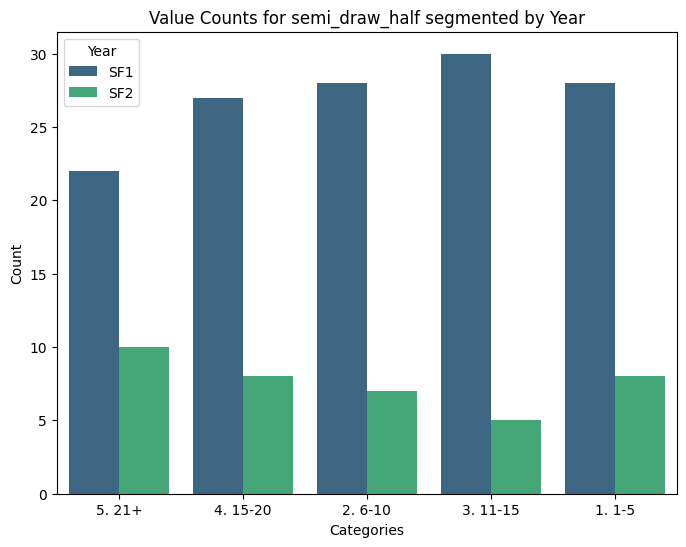

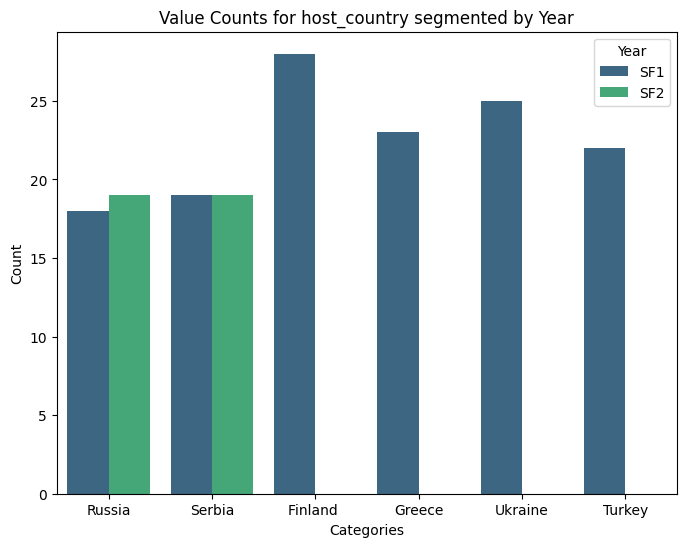

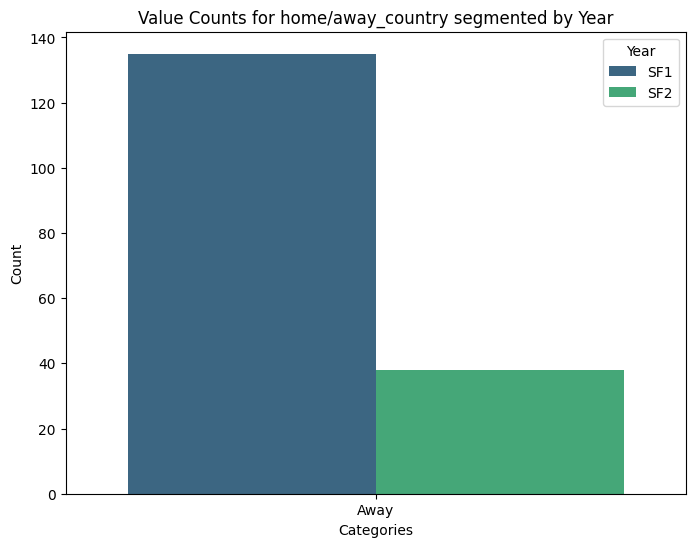

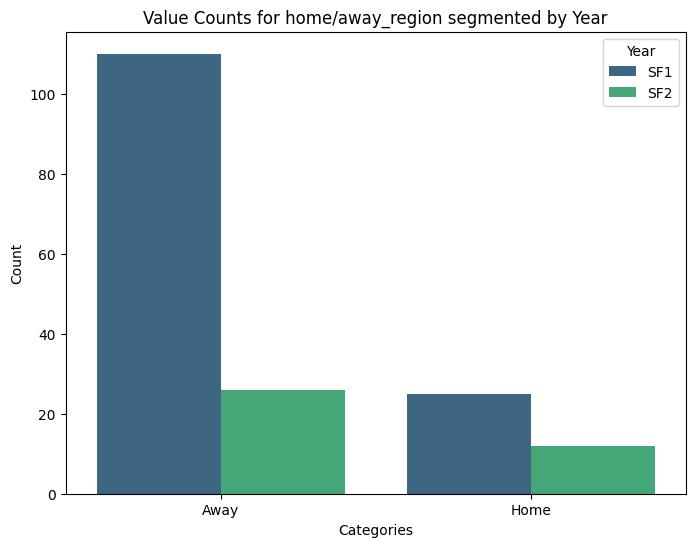

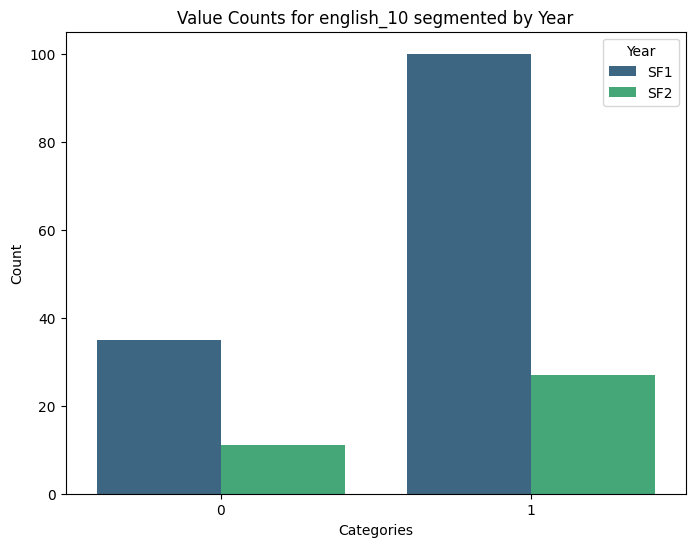

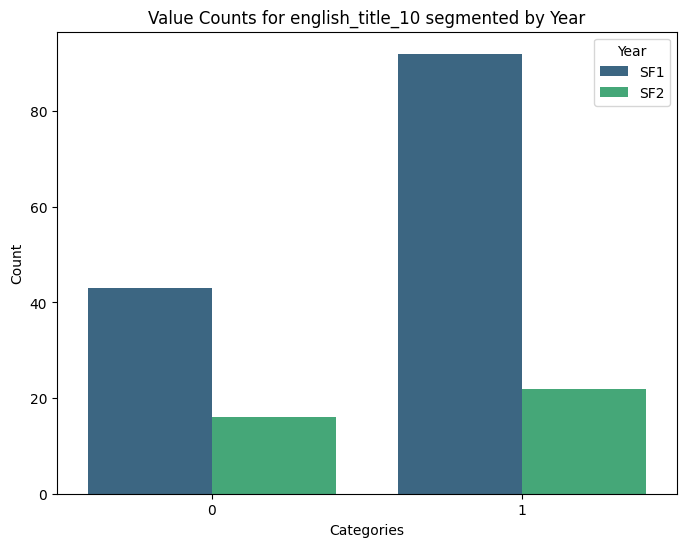

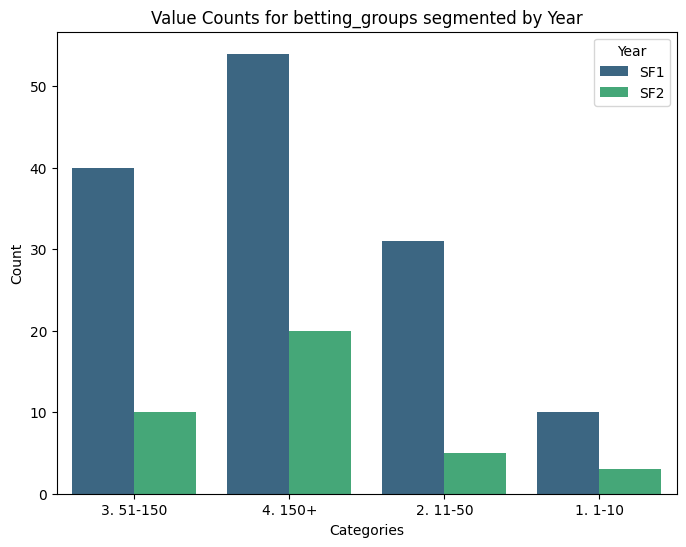

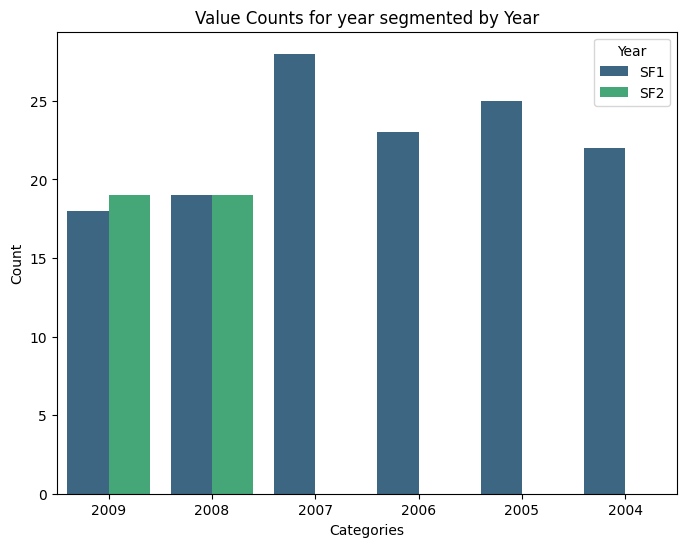

In [33]:
categorical_columns_SF_round = ['english_10', 'region','semi_draw_group','semi_draw_half',
                       'host_country','home/away_country','home/away_region','english_10',
                       'english_title_10','betting_groups', 'year']

for column in categorical_columns_SF_round:  
    plt.figure(figsize=(8, 6))
    sns.countplot(data=SEMIFINAL_DATA_2004_2009, x=column, hue='round', palette='viridis')
    plt.title(f'Value Counts for {column} segmented by Year')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.legend(title='Year')
    plt.show()

<div class="alert alert-block alert-warning"style="font-size: 17px;">
    
<h4>SEMI_FINAL EDA 2 CONCLUSIONS</h4>
--------------

* In previous years it wan´t made in Former Socialistit region as much as in 2009
* Over the years, singers have been singing increasingly more in English, however there is not such a direct insight with the song title

    

</div>

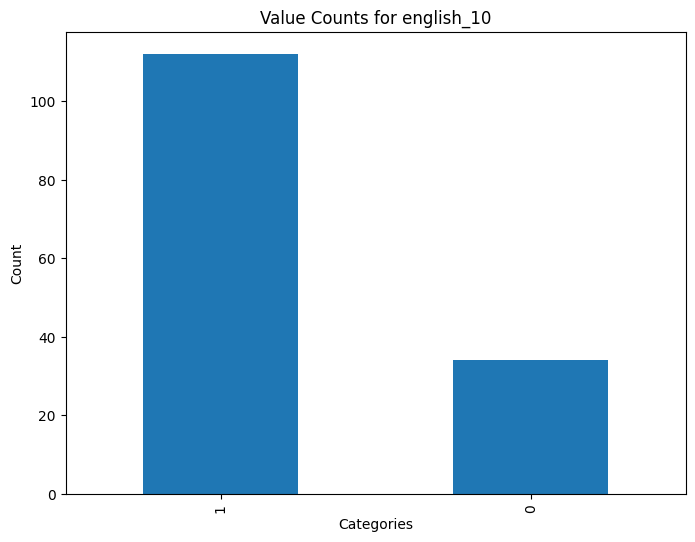

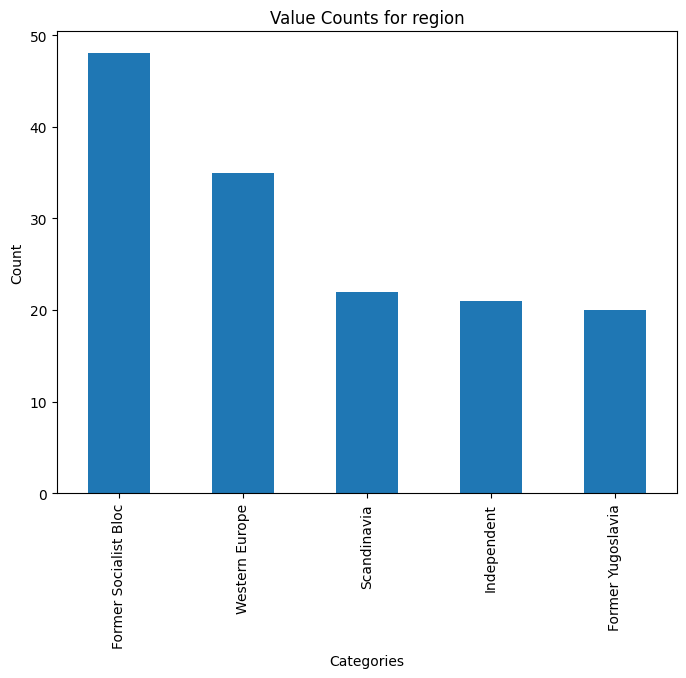

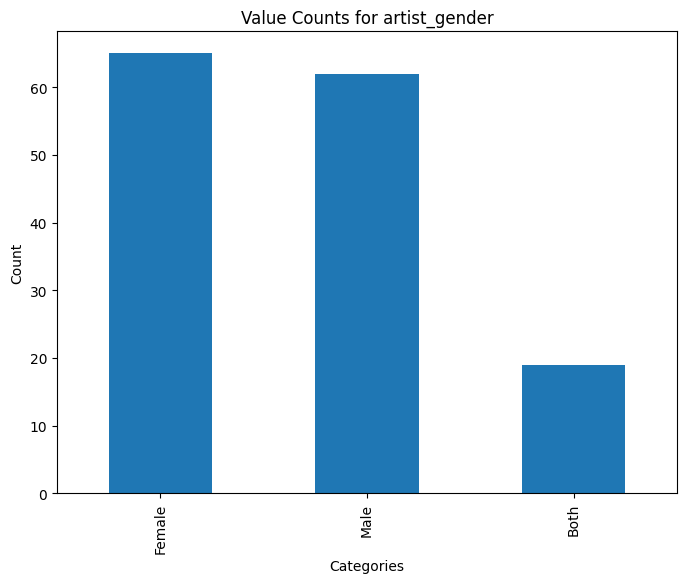

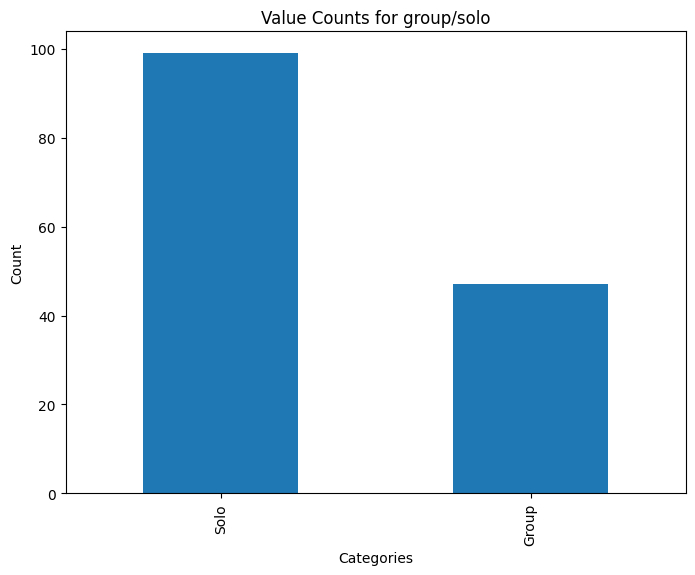

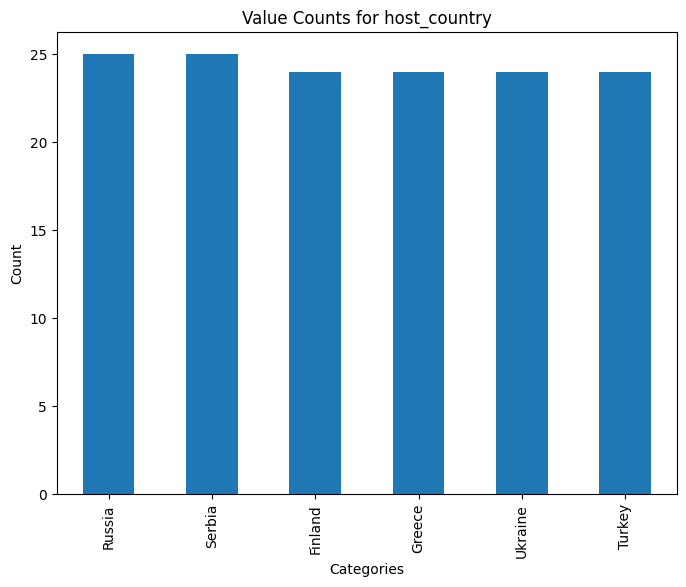

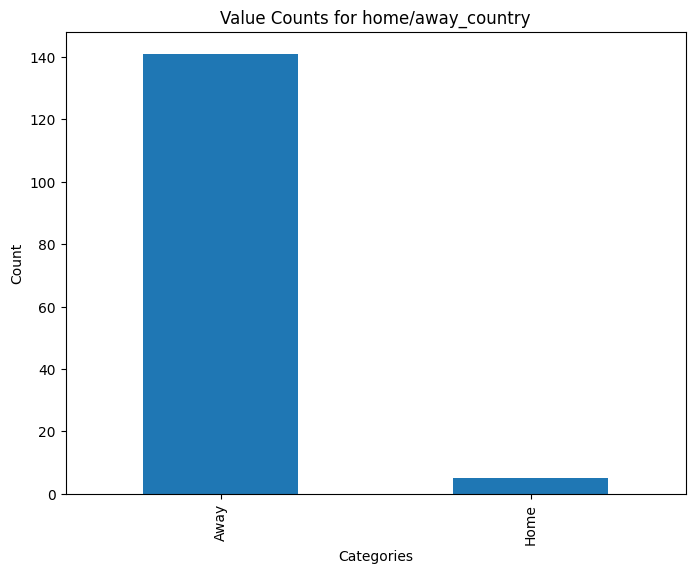

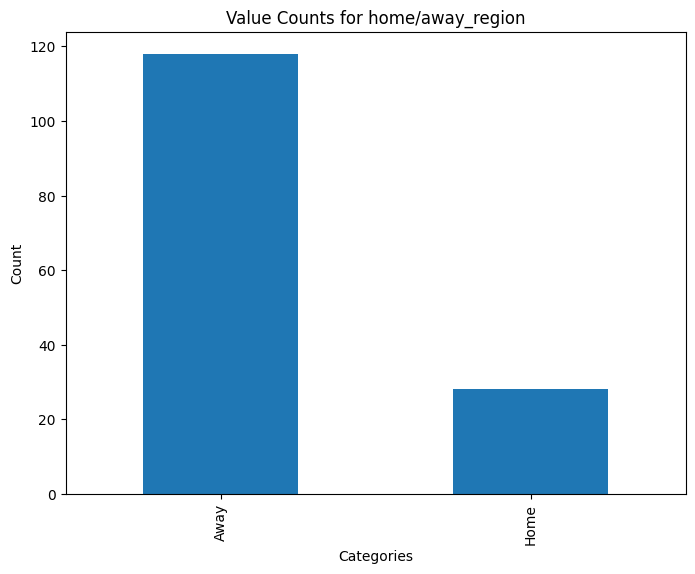

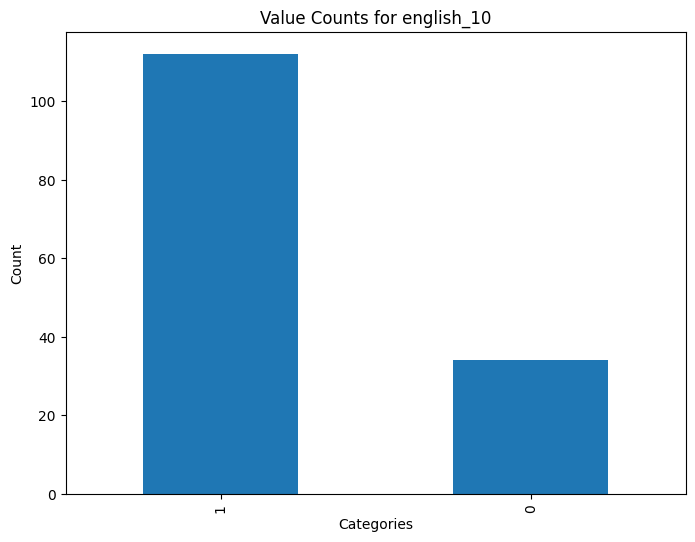

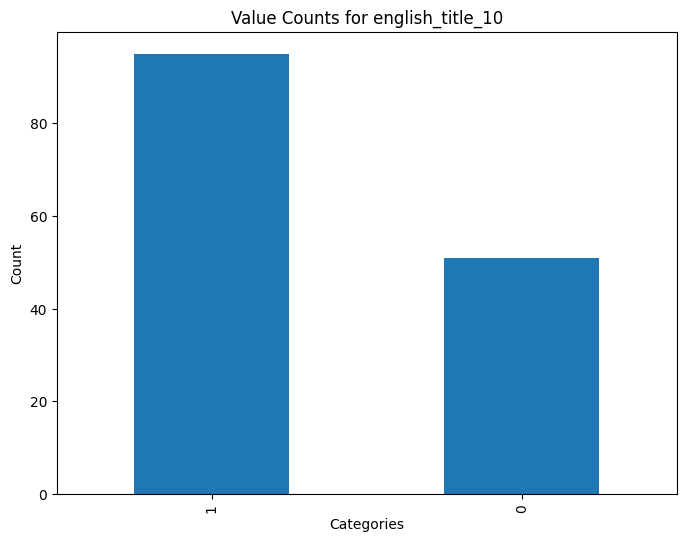

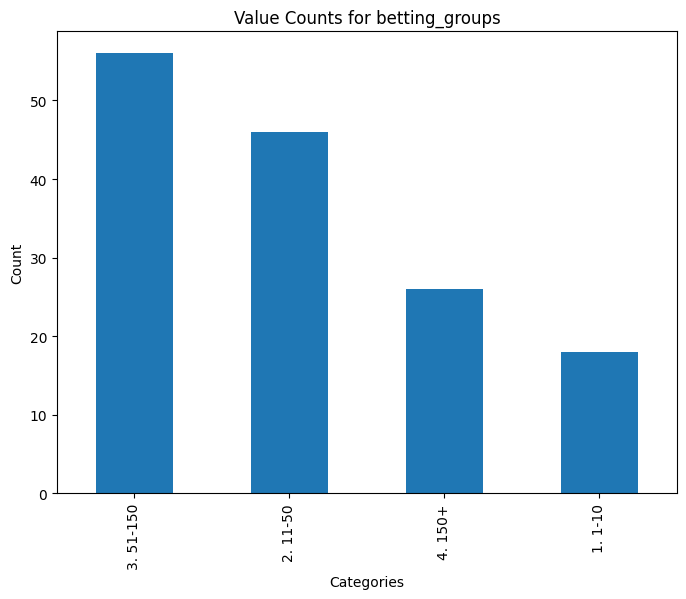

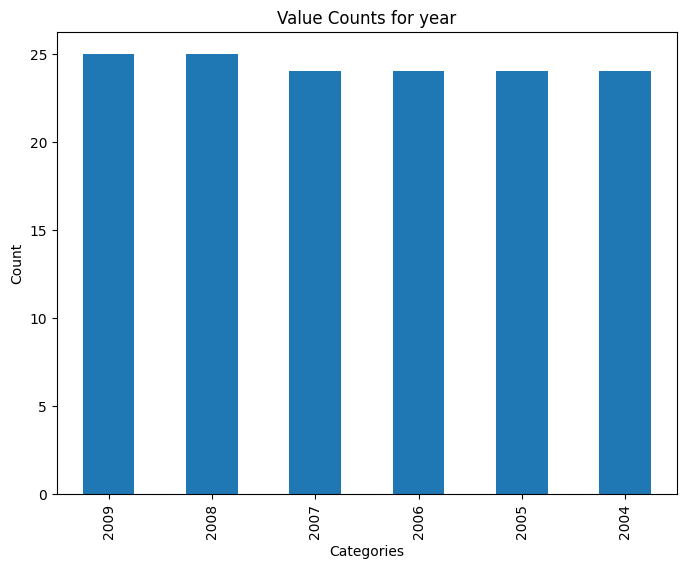

In [34]:
for column in categorical_columns_F: # Checking if the column contains categorical data
        value_counts = FINAL_DATA_2004_2009_EDA[column].value_counts()
        plt.figure(figsize=(8, 6))
        value_counts.plot(kind='bar')
        plt.title(f'Value Counts for {column}')
        plt.xlabel('Categories')
        plt.ylabel('Count')
        plt.show()

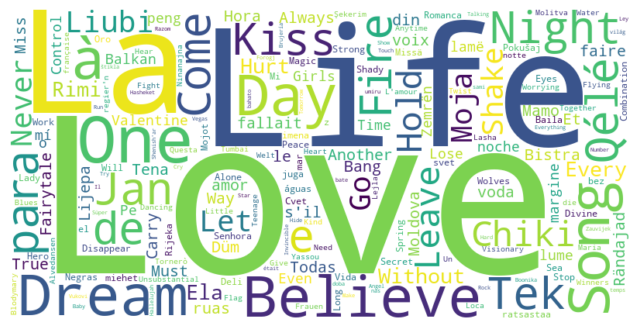

In [35]:
text_data = ' '.join(FINAL_DATA_2004_2009_EDA['song'])  
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

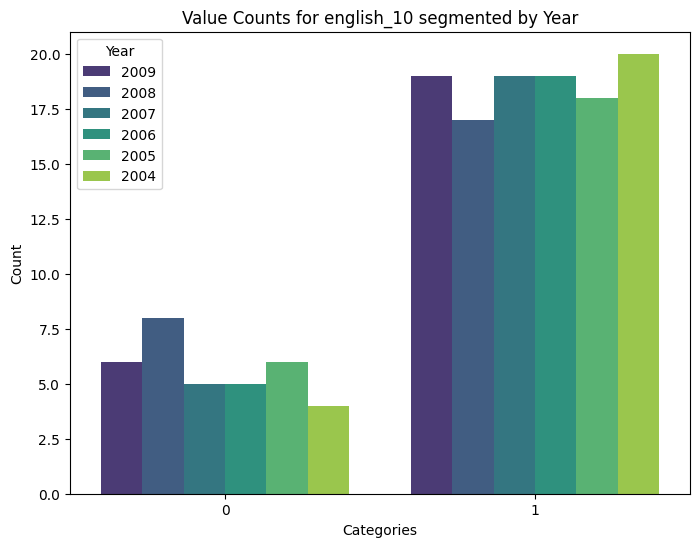

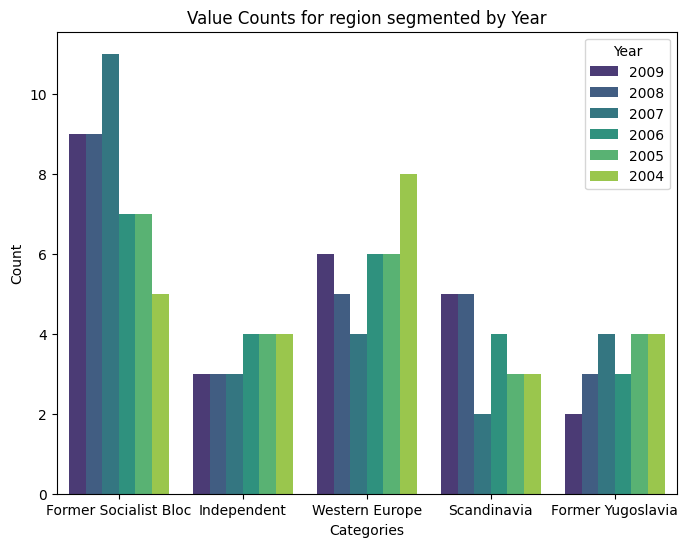

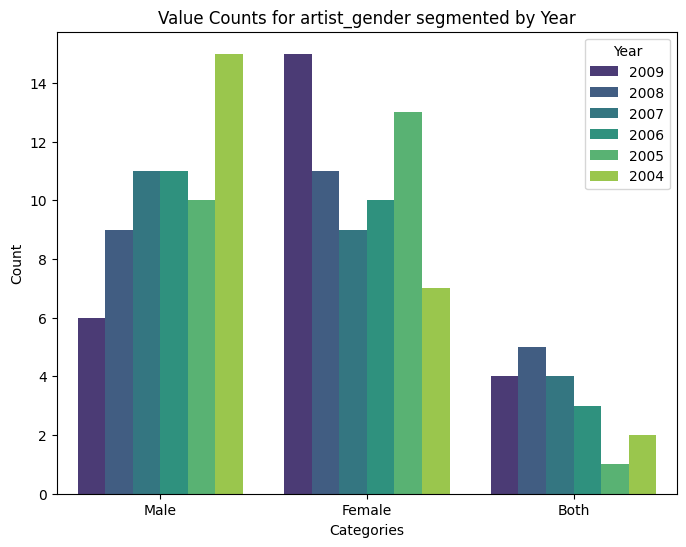

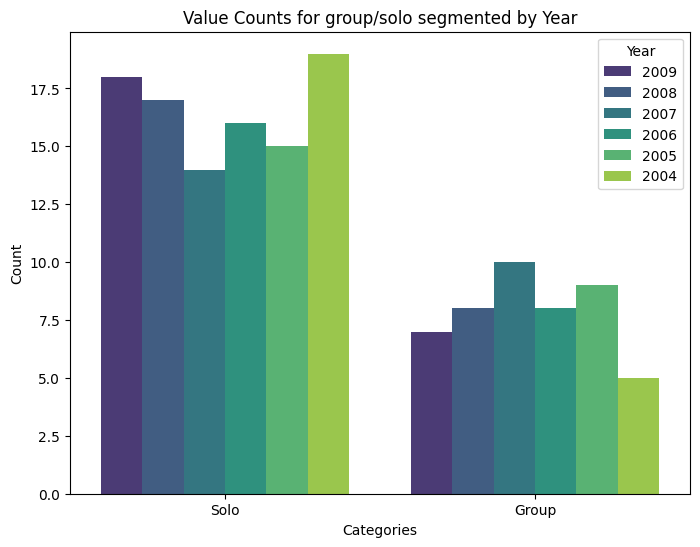

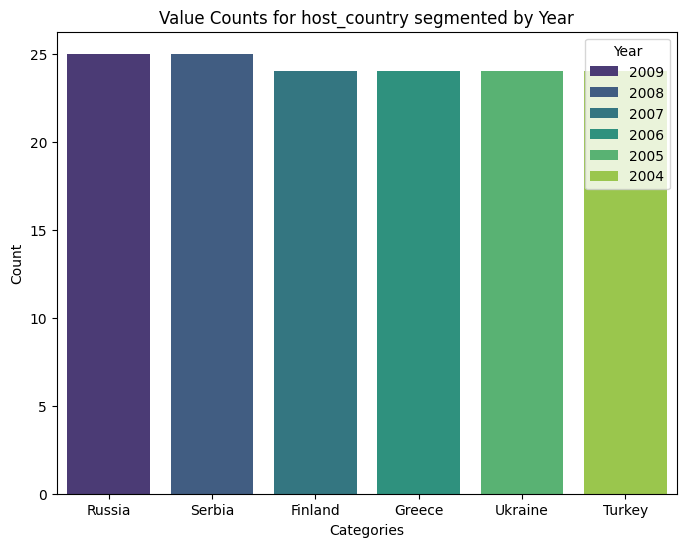

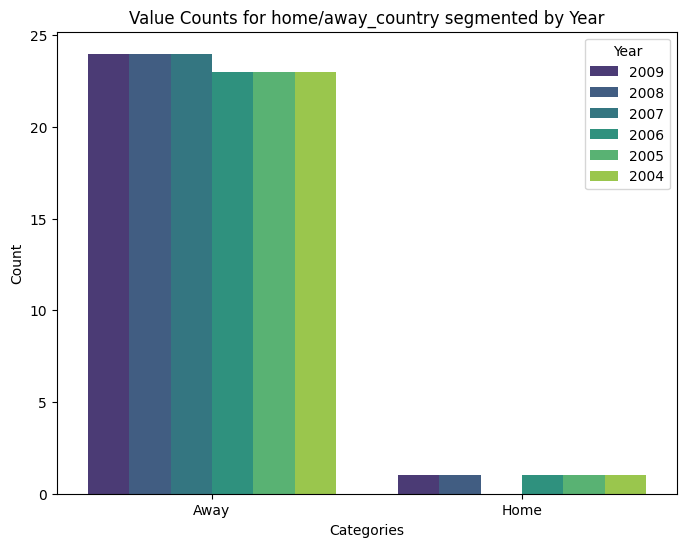

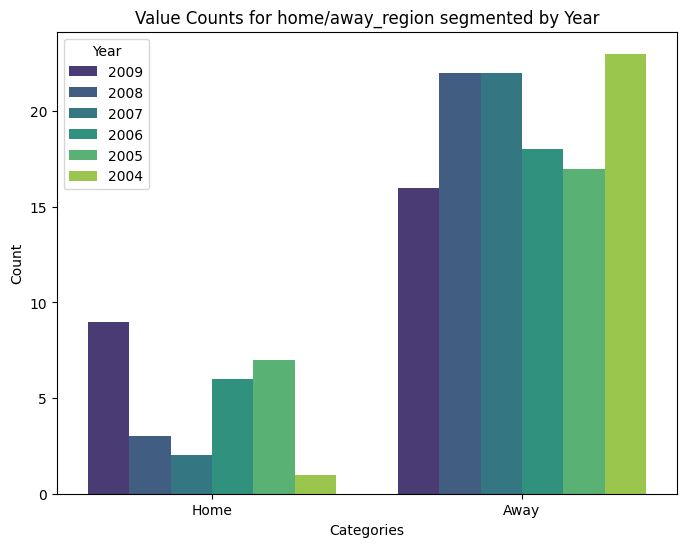

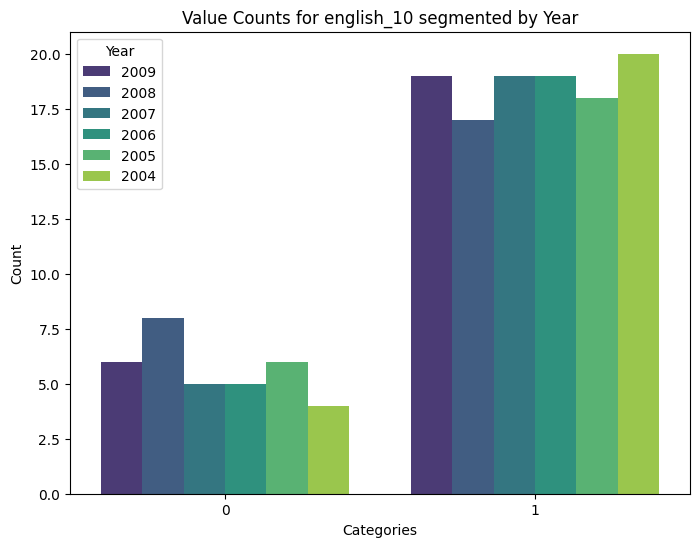

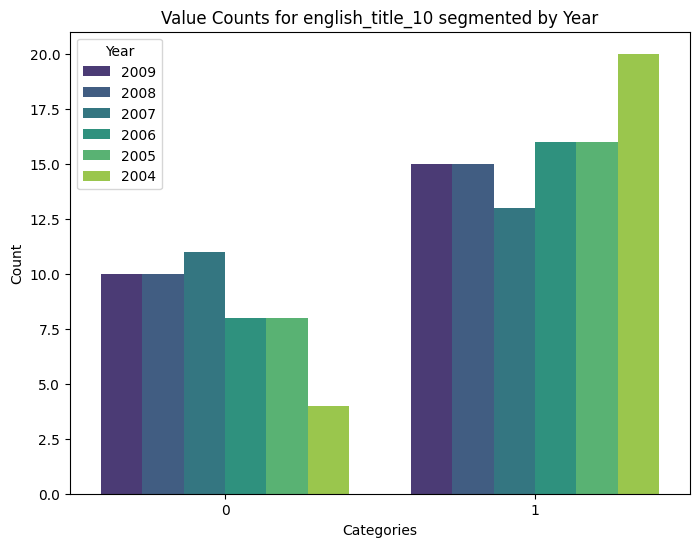

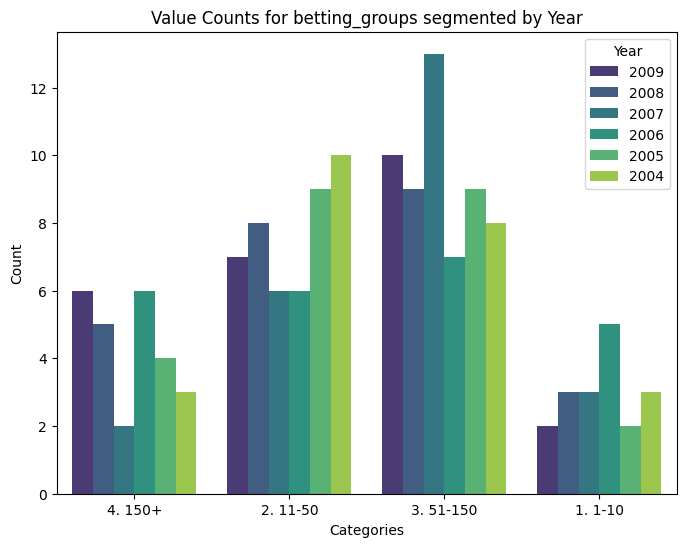

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


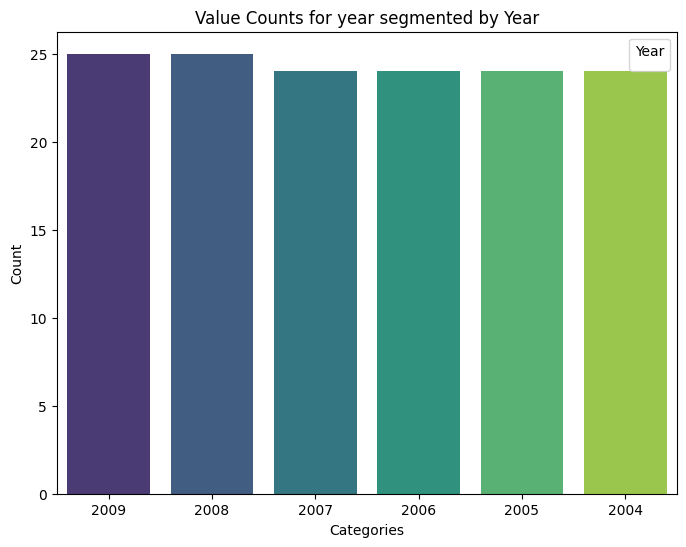

In [36]:
for column in categorical_columns_F:  # Loop through categorical columns
    plt.figure(figsize=(8, 6))
    sns.countplot(data=FINAL_DATA_2004_2009_EDA, x=column, hue='year', palette='viridis')
    plt.title(f'Value Counts for {column} segmented by Year')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.legend(title='Year')
    plt.show()

<div class="alert alert-block alert-warning"style="font-size: 17px;">
    
<h4>FINAL EDA 1</h4>
--------------

* The Contest is mostly held in Former Socialist Bloc. Then Western Europe. The order of Host countries is Serbia first, then Russia, then Finland
* Most songs are in English or contain English
* Again, the word that appears most in the finals song titles is Love
* Compared to the Semifinals, some contestants perform in the finals in their Home/Country
* Most of the singers are female and the least are both (male and female)
* Most of the song titles appear in English
* More singers perform solo (84 solo, 38 Group)
* 118 countries perform in Away country. 4 perform in Home country and 21 perform in Home Region

</div>

<div class="alert alert-block alert-warning"style="font-size: 17px;">
    
<h4>FINAL EDA 2 Conclusions</h4>
--------------

* In 2004 and earlier years there were more Male singers and the other way around for Female."Both" has increased over the years
</div>

In [37]:
FINAL_DATA_2004_2009_EDA.shape

(146, 23)

In [38]:
SEMIFINAL_DATA_2004_2009_EDA.columns
SEMIFINAL_DATA_2004_2009_EDA.drop(columns=["round"], inplace=True)
FINAL_DATA_2004_2009_EDA.drop(columns=["round"], inplace=True)


### Merging Final and Semifinal

In [39]:
MERGED_FINAL_AND_SEMI_EDA = pd.merge(FINAL_DATA_2004_2009_EDA, SEMIFINAL_DATA_2004_2009_EDA, on=['year', 'country', 'song', 'song_language', 
                                                                                                       'region', 'artist', 'host_country', 'host_region', 'home/away_country',
                                                                                                      'home/away_region','english_10', 'english_title_10',
                                                                                                      'english_translation'])
MERGED_FINAL_AND_SEMI_EDA.rename(columns={'place_x': 'place_final', 'points_x': 'points_final', 'approximate_betting_prices_x': 'approximate_betting_prices_final',
                                     'place_y': 'place_semifinal', 'points_y': 'points_semifinal',  'approximate_betting_prices_y':  'approximate_betting_prices_semifinal',
                                     'betting_groups_y': 'betting_groups_semifinal','betting_groups_x': 'betting_groups_final'
                                        }, inplace=True)

In [40]:
MERGED_FINAL_AND_SEMI_EDA

,year,country,region,song_language,artist,song,english_translation,artist_gender,group/solo,place_final,points_final,host_country,host_region,home/away_country,home/away_region,approximate_betting_prices_final,final_top_10,final_draw_group,final_draw_half,english_10,english_title_10,betting_groups_final,place_semifinal,points_semifinal,approximate_betting_prices_semifinal,semifinal_top_10,semi_draw_group,semi_draw_half,betting_groups_semifinal
0,2008,Armenia,Former Socialist Bloc,"English, Armenian",Sirusho,"""Qélé, Qélé""","Come on, come on",Female,Solo,4.0,198,Serbia,Former Yugoslavia,Away,Away,14.339981,1,1. 1-5,1. 1-5,1,0,2. 11-50,11.0,139,14.339981,0,3. 11-15,3. 11-15,2. 11-50
1,2008,Israel,Independent,"Hebrew, English",Boaz Ma'uda,"""The Fire in Your Eyes""",—,Male,Solo,9.0,124,Serbia,Former Yugoslavia,Away,Away,120.029204,1,2. 6-10,2. 6-10,1,1,3. 51-150,12.0,104,120.029204,0,3. 11-15,3. 11-15,3. 51-150
2,2008,Croatia,Former Yugoslavia,Croatian,Kraljevi Ulice and 75 cents,"""Romanca""",Romance,Both,Group,21.0,42,Serbia,Former Yugoslavia,Away,Home,247.984665,0,4. 16+,5. 21+,0,0,4. 150+,1.0,112,247.984665,1,1. 1-5,1. 1-5,4. 150+
3,2008,Sweden,Scandinavia,English,Charlotte Perrelli,"""Hero""",—,Female,Solo,18.0,47,Serbia,Former Yugoslavia,Away,Away,16.044959,0,4. 16+,4. 15-20,1,1,2. 11-50,9.0,54,16.044959,1,2. 6-10,2. 6-10,2. 11-50
4,2008,Denmark,Scandinavia,English,Simon Mathew,"""All Night Long""",—,Male,Solo,15.0,60,Serbia,Former Yugoslavia,Away,Away,106.272200,0,3. 11-15,3. 11-15,1,1,3. 51-150,23.0,112,106.272200,0,4. 16+,5. 21+,3. 51-150
5,2008,Azerbaijan,Former Socialist Bloc,English,Elnur and Samir,"""Day After Day""",—,Both,Group,8.0,124,Serbia,Former Yugoslavia,Away,Away,90.376555,1,2. 6-10,2. 6-10,1,1,3. 51-150,19.0,96,90.376555,0,4. 16+,4. 15-20,3. 51-150
6,2008,Russia,Former Socialist Bloc,English,Dima Bilan,"""Believe""",—,Male,Solo,1.0,266,Serbia,Former Yugoslavia,Away,Away,2.506033,1,1. 1-5,1. 1-5,1,1,1. 1-10,17.0,135,2.506033,0,4. 16+,4. 15-20,1. 1-10
7,2008,Norway,Scandinavia,English,Maria Haukaas Storeng,"""Hold On Be Strong""",—,Female,Solo,5.0,182,Serbia,Former Yugoslavia,Away,Away,47.592654,1,1. 1-5,1. 1-5,1,1,2. 11-50,3.0,106,47.592654,1,1. 1-5,1. 1-5,2. 11-50
8,2006,Lithuania,Former Socialist Bloc,"English, French",LT United,"""We Are The Winners""",—,Male,Group,6.0,162,Greece,Western Europe,Away,Away,89.542032,1,2. 6-10,2. 6-10,1,1,3. 51-150,5.0,163,89.542032,1,1. 1-5,1. 1-5,3. 51-150
9,2006,Finland,Scandinavia,English,Lordi,"""Hard Rock Hallelujah""",—,Male,Group,1.0,292,Greece,Western Europe,Away,Away,2.546106,1,1. 1-5,1. 1-5,1,1,1. 1-10,14.0,292,2.546106,0,3. 11-15,3. 11-15,1. 1-10


- It doesn´t make sense to me that there are contestants in the Final that are not in the Semifinal. Merged data can´t be fed to the modelbut I can do some analysis

### Evaluating what metrics affect the number of points and thus the final position

- Now I will see how metrics individually affect the points (The metric that defines who wins)
- First the semifinal, then final and the semifinal and final together

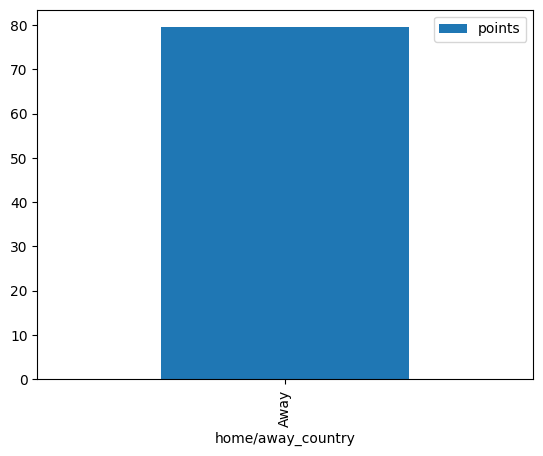

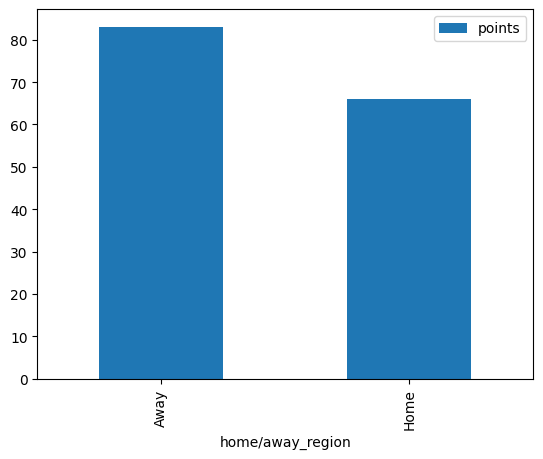

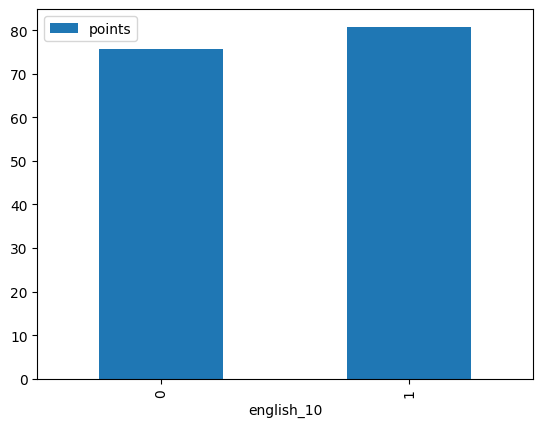

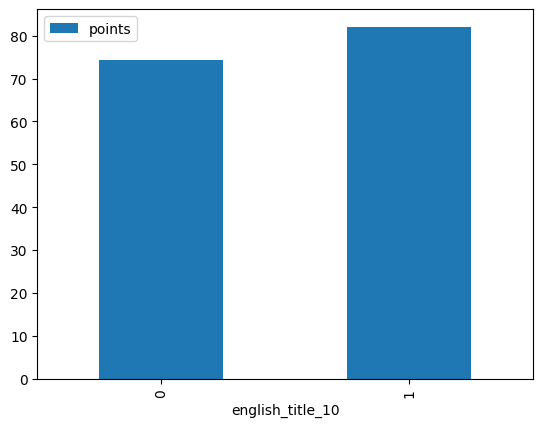

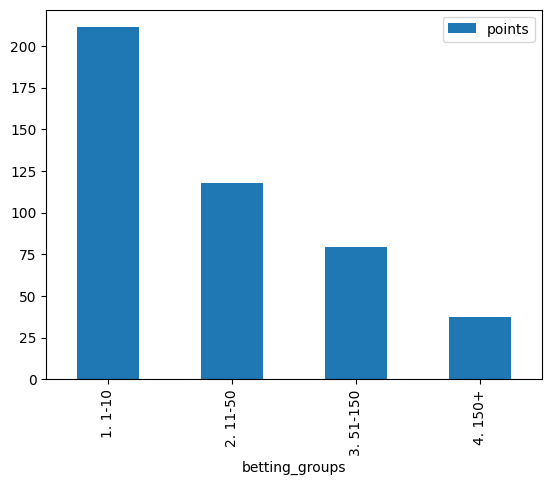

In [41]:
# Average Number of Points in SemiFinal
metrics2 = ['home/away_country','home/away_region','english_10',
           'english_title_10','betting_groups']
for metric in metrics2:
  plot_data = SEMIFINAL_DATA_2004_2009_EDA[[metric, 'points']].groupby(metric).agg('mean').reset_index()
  plot_data.plot(kind='bar',x=metric, y=['points'])

<div class="alert alert-block alert-warning"style="font-size: 17px;">
    
<h4>SEMIFINAL METRIC INSIGHTS</h4>
--------------

* People that perform Away in the region get more points in Semifinal. Interesting
* In Semifinals, the language is not that deterministic of points
    

</div>

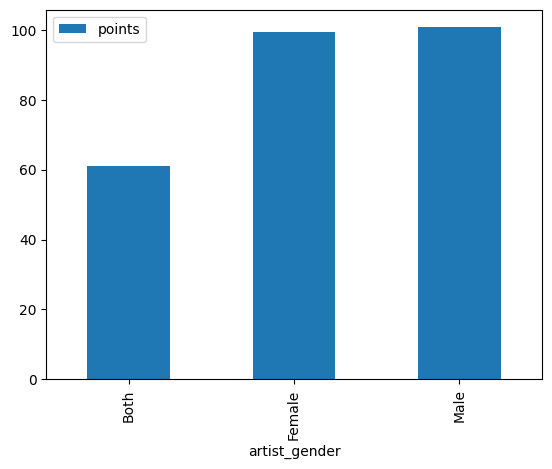

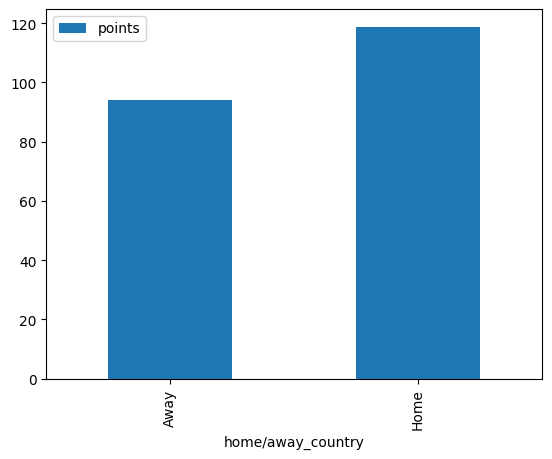

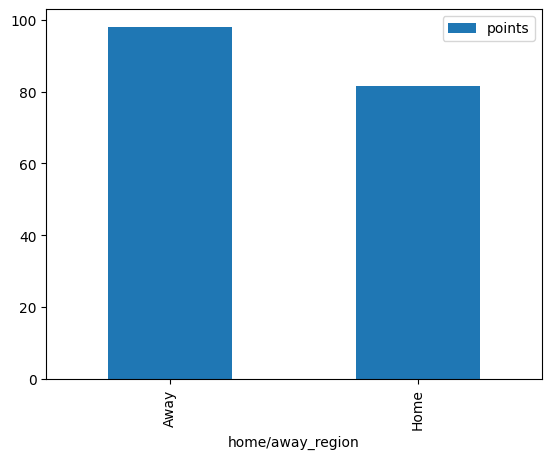

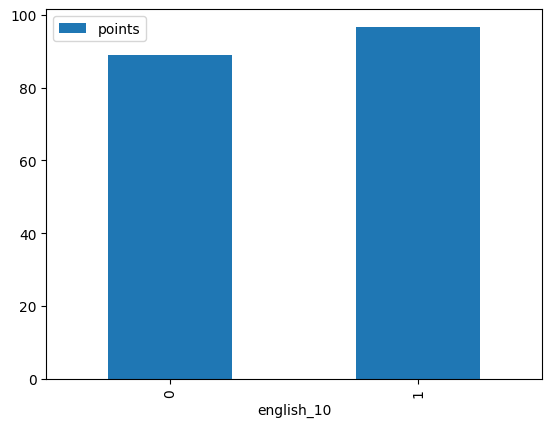

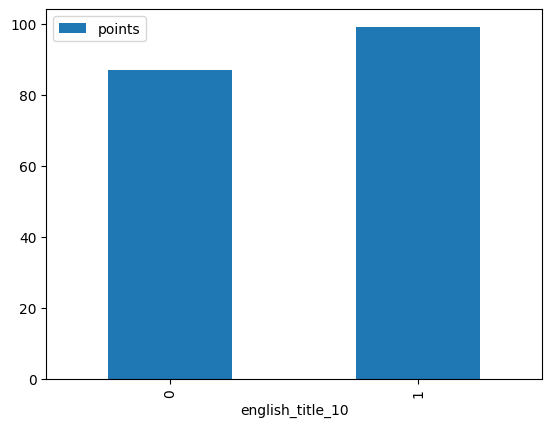

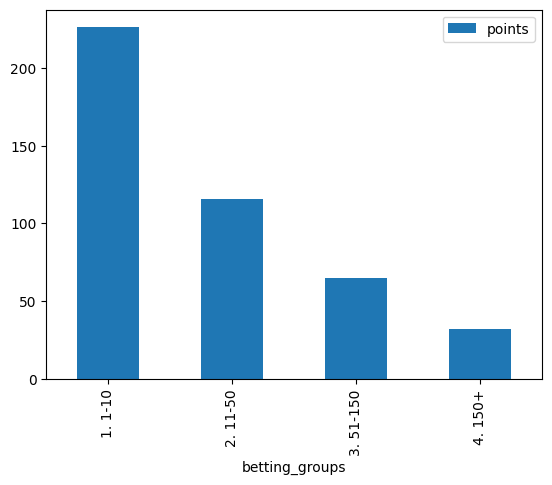

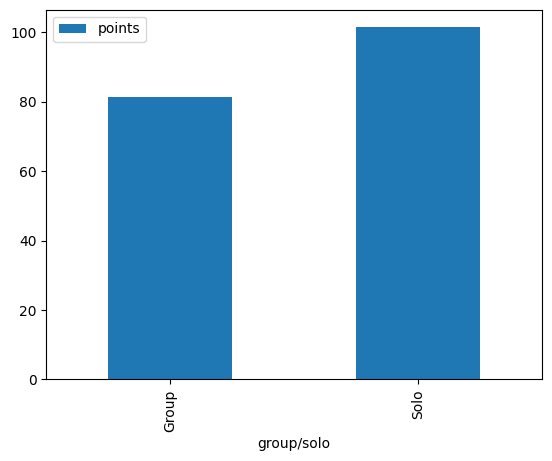

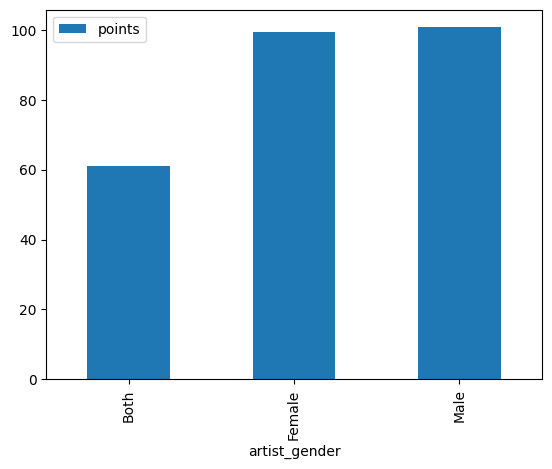

In [42]:
# Average Number of Points in Final
metrics = ['artist_gender','home/away_country','home/away_region','english_10',
           'english_title_10','betting_groups',
           'group/solo', 'artist_gender']
for metric in metrics:
  plot_data = FINAL_DATA_2004_2009_EDA[[metric, 'points']].groupby(metric).agg('mean').reset_index()
  plot_data.plot(kind='bar',x=metric, y=['points'])

<div class="alert alert-block alert-warning"style="font-size: 17px;">
    
<h4>FINAL METRIC INSIGHTS</h4>
--------------

* Contestants that are both Male and Female are less likely to win in the final
* Female and Male are not that dependent on target variable
* Performing Home in the final country is correlated to winning more points
* Performing Away in the final region is correlated to winning more points
* Singing an English Song or having an English title as the song gets more points
* Performing solo in the final is more correlated to having more points
    

</div>

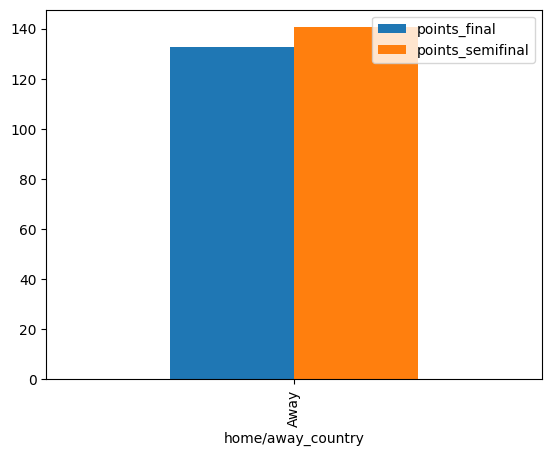

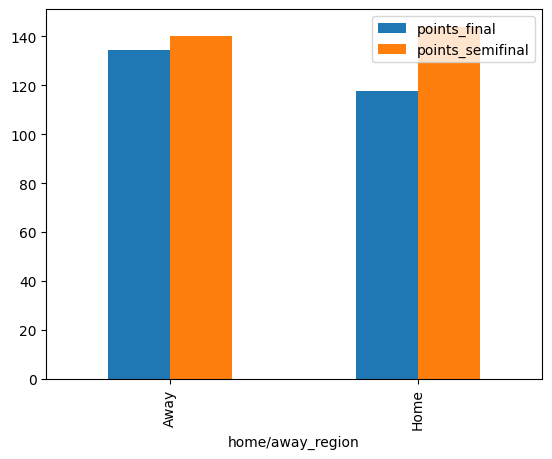

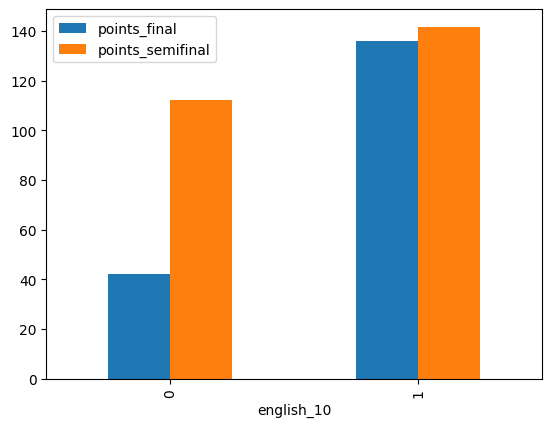

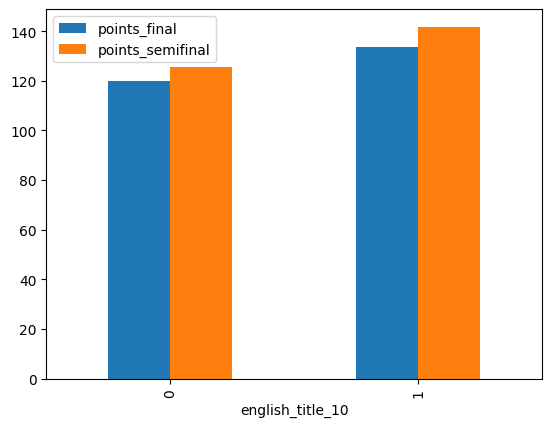

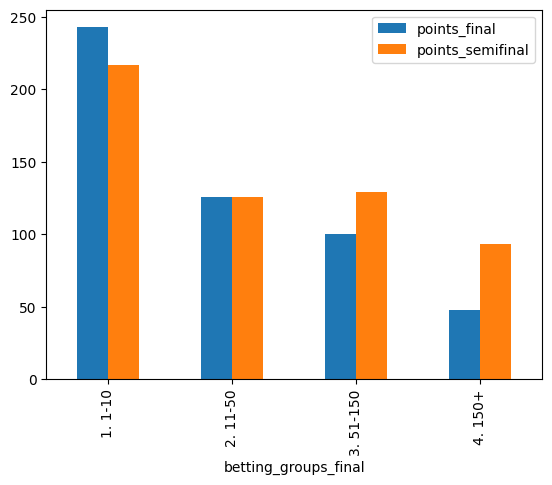

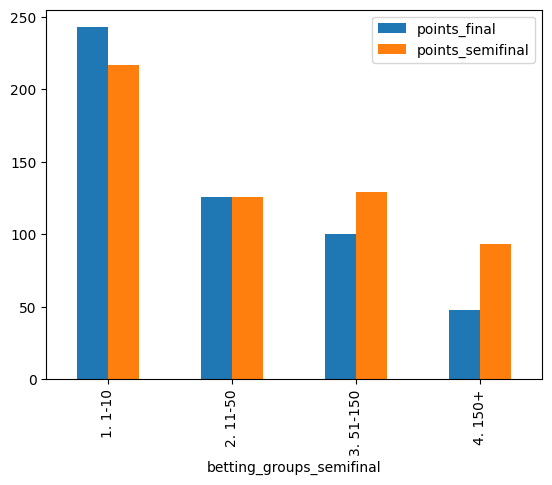

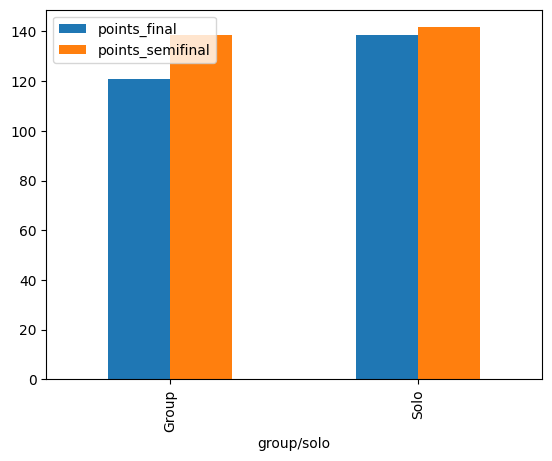

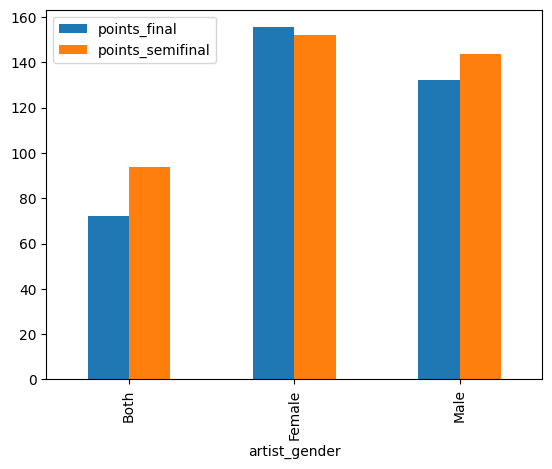

In [43]:
# Average Number of Points in Merged semi and final
metrics3 = ['home/away_country','home/away_region','english_10',
           'english_title_10','betting_groups_final', "betting_groups_semifinal",
           'group/solo', 'artist_gender']
for metric in metrics3:
  plot_data = MERGED_FINAL_AND_SEMI_EDA[[metric, 'points_final', 'points_semifinal']].groupby(metric).agg('mean').reset_index()
  plot_data.plot(kind='bar',x=metric, y=['points_final', 'points_semifinal'])

In [104]:
MERGED_FINAL_AND_SEMI_EDA.head(5)

,year,country,region,song_language,artist,song,english_translation,artist_gender,group/solo,place_final,points_final,host_country,host_region,home/away_country,home/away_region,approximate_betting_prices_final,final_top_10,final_draw_group,final_draw_half,english_10,english_title_10,betting_groups_final,place_semifinal,points_semifinal,approximate_betting_prices_semifinal,semifinal_top_10,semi_draw_group,semi_draw_half,betting_groups_semifinal
0,2008,Armenia,Former Socialist Bloc,"English, Armenian",Sirusho,"""Qélé, Qélé""","Come on, come on",Female,Solo,4.0,198,Serbia,Former Yugoslavia,Away,Away,14.339981,1,1. 1-5,1. 1-5,1,0,2. 11-50,11.0,139,14.339981,0,3. 11-15,3. 11-15,2. 11-50
1,2008,Israel,Independent,"Hebrew, English",Boaz Ma'uda,"""The Fire in Your Eyes""",—,Male,Solo,9.0,124,Serbia,Former Yugoslavia,Away,Away,120.029204,1,2. 6-10,2. 6-10,1,1,3. 51-150,12.0,104,120.029204,0,3. 11-15,3. 11-15,3. 51-150
2,2008,Croatia,Former Yugoslavia,Croatian,Kraljevi Ulice and 75 cents,"""Romanca""",Romance,Both,Group,21.0,42,Serbia,Former Yugoslavia,Away,Home,247.984665,0,4. 16+,5. 21+,0,0,4. 150+,1.0,112,247.984665,1,1. 1-5,1. 1-5,4. 150+
3,2008,Sweden,Scandinavia,English,Charlotte Perrelli,"""Hero""",—,Female,Solo,18.0,47,Serbia,Former Yugoslavia,Away,Away,16.044959,0,4. 16+,4. 15-20,1,1,2. 11-50,9.0,54,16.044959,1,2. 6-10,2. 6-10,2. 11-50
4,2008,Denmark,Scandinavia,English,Simon Mathew,"""All Night Long""",—,Male,Solo,15.0,60,Serbia,Former Yugoslavia,Away,Away,106.272200,0,3. 11-15,3. 11-15,1,1,3. 51-150,23.0,112,106.272200,0,4. 16+,5. 21+,3. 51-150


<Axes: xlabel='betting_groups_semifinal'>

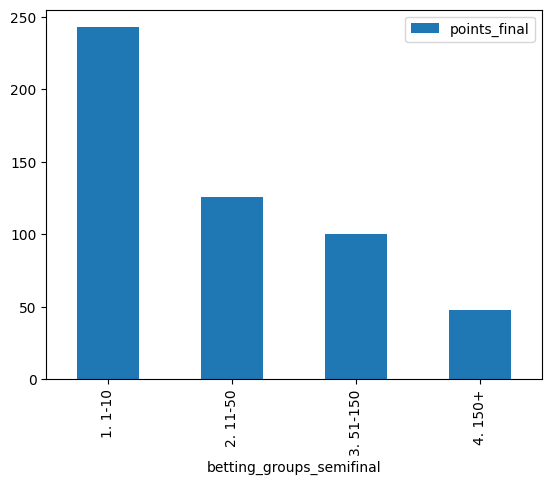

In [45]:
# Average Number of Points in Merged semi and final
plot_data = MERGED_FINAL_AND_SEMI_EDA[['betting_groups_semifinal', 'points_final']].groupby('betting_groups_semifinal').agg('mean').reset_index()
plot_data.plot(kind='bar',x='betting_groups_semifinal', y=['points_final'])

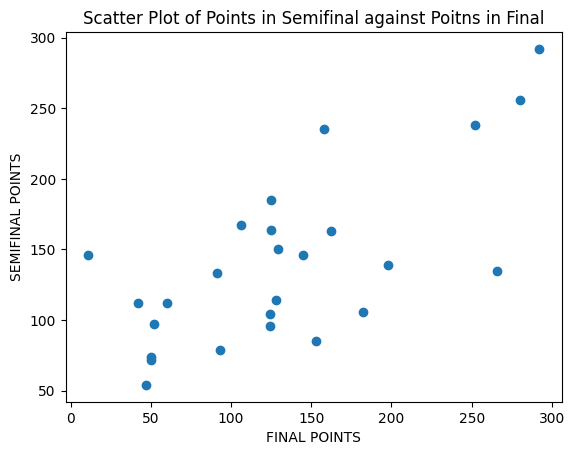

In [46]:
plt.scatter(MERGED_FINAL_AND_SEMI_EDA['points_final'], MERGED_FINAL_AND_SEMI_EDA['points_semifinal'])
plt.title('Scatter Plot of Points in Semifinal against Poitns in Final')
plt.xlabel('FINAL POINTS')
plt.ylabel('SEMIFINAL POINTS')
plt.show()

<div class="alert alert-block alert-warning"style="font-size: 17px;">
    
<h4> MERGED FINAL AND SEMIFINAL METRIC INSIGHTS</h4>
--------------

* Singing in English is more important in the finals than in the Semifinal
* In the Finals, singing as a Both Male and Female is penalised more than in the Semifinal
* As we can see in the Scatterplot, the points in the final and the points in the Semifinals are correlated, even though there can be exceptions
    

</div>

In [47]:
MERGED_FINAL_AND_SEMI_EDA.head(13)

,year,country,region,song_language,artist,song,english_translation,artist_gender,group/solo,place_final,points_final,host_country,host_region,home/away_country,home/away_region,approximate_betting_prices_final,final_top_10,final_draw_group,final_draw_half,english_10,english_title_10,betting_groups_final,place_semifinal,points_semifinal,approximate_betting_prices_semifinal,semifinal_top_10,semi_draw_group,semi_draw_half,betting_groups_semifinal
0,2008,Armenia,Former Socialist Bloc,"English, Armenian",Sirusho,"""Qélé, Qélé""","Come on, come on",Female,Solo,4.0,198,Serbia,Former Yugoslavia,Away,Away,14.339981,1,1. 1-5,1. 1-5,1,0,2. 11-50,11.0,139,14.339981,0,3. 11-15,3. 11-15,2. 11-50
1,2008,Israel,Independent,"Hebrew, English",Boaz Ma'uda,"""The Fire in Your Eyes""",—,Male,Solo,9.0,124,Serbia,Former Yugoslavia,Away,Away,120.029204,1,2. 6-10,2. 6-10,1,1,3. 51-150,12.0,104,120.029204,0,3. 11-15,3. 11-15,3. 51-150
2,2008,Croatia,Former Yugoslavia,Croatian,Kraljevi Ulice and 75 cents,"""Romanca""",Romance,Both,Group,21.0,42,Serbia,Former Yugoslavia,Away,Home,247.984665,0,4. 16+,5. 21+,0,0,4. 150+,1.0,112,247.984665,1,1. 1-5,1. 1-5,4. 150+
3,2008,Sweden,Scandinavia,English,Charlotte Perrelli,"""Hero""",—,Female,Solo,18.0,47,Serbia,Former Yugoslavia,Away,Away,16.044959,0,4. 16+,4. 15-20,1,1,2. 11-50,9.0,54,16.044959,1,2. 6-10,2. 6-10,2. 11-50
4,2008,Denmark,Scandinavia,English,Simon Mathew,"""All Night Long""",—,Male,Solo,15.0,60,Serbia,Former Yugoslavia,Away,Away,106.272200,0,3. 11-15,3. 11-15,1,1,3. 51-150,23.0,112,106.272200,0,4. 16+,5. 21+,3. 51-150
5,2008,Azerbaijan,Former Socialist Bloc,English,Elnur and Samir,"""Day After Day""",—,Both,Group,8.0,124,Serbia,Former Yugoslavia,Away,Away,90.376555,1,2. 6-10,2. 6-10,1,1,3. 51-150,19.0,96,90.376555,0,4. 16+,4. 15-20,3. 51-150
6,2008,Russia,Former Socialist Bloc,English,Dima Bilan,"""Believe""",—,Male,Solo,1.0,266,Serbia,Former Yugoslavia,Away,Away,2.506033,1,1. 1-5,1. 1-5,1,1,1. 1-10,17.0,135,2.506033,0,4. 16+,4. 15-20,1. 1-10
7,2008,Norway,Scandinavia,English,Maria Haukaas Storeng,"""Hold On Be Strong""",—,Female,Solo,5.0,182,Serbia,Former Yugoslavia,Away,Away,47.592654,1,1. 1-5,1. 1-5,1,1,2. 11-50,3.0,106,47.592654,1,1. 1-5,1. 1-5,2. 11-50
8,2006,Lithuania,Former Socialist Bloc,"English, French",LT United,"""We Are The Winners""",—,Male,Group,6.0,162,Greece,Western Europe,Away,Away,89.542032,1,2. 6-10,2. 6-10,1,1,3. 51-150,5.0,163,89.542032,1,1. 1-5,1. 1-5,3. 51-150
9,2006,Finland,Scandinavia,English,Lordi,"""Hard Rock Hallelujah""",—,Male,Group,1.0,292,Greece,Western Europe,Away,Away,2.546106,1,1. 1-5,1. 1-5,1,1,1. 1-10,14.0,292,2.546106,0,3. 11-15,3. 11-15,1. 1-10


# 05 - Checking relation with target variable (FEATURE SELECTION)

In [48]:
FINAL_DATA_2004_2009.columns

Index(['year', 'country', 'region', 'song_language', 'artist', 'song',
       'english_translation', 'artist_gender', 'group/solo', 'place', 'points',
       'host_country', 'host_region', 'home/away_country', 'home/away_region',
       'approximate_betting_prices', 'albania', 'andorra', 'armenia',
       'austria', 'azerbaijan', 'belarus', 'belgium', 'bosnia_and_herzegovina',
       'bulgaria', 'croatia', 'cyprus', 'czech_republic', 'denmark', 'estonia',
       'finland', 'france', 'georgia', 'germany', 'greece', 'hungary',
       'iceland', 'ireland', 'israel', 'latvia', 'lithuania', 'macedonia',
       'malta', 'moldova', 'monaco', 'montenegro', 'netherlands', 'norway',
       'poland', 'portugal', 'romania', 'russia', 'san_marino', 'serbia',
       'serbia_&_montenegro', 'slovakia', 'slovenia', 'spain', 'sweden',
       'switzerland', 'turkey', 'ukraine', 'united_kingdom', 'final_top_10',
       'final_draw_group', 'final_draw_half', 'english_10', 'english_title_10',
       'bettin

In [49]:

final_columns_for_model_PREMODEL = ['year','artist','host_country','song', 'english_10', 'english_title_10', 'place', 'points', 
                              'home_country_10','away_country_10','home_region_10', 'away_region_10',
                              'male_10', 'female_10','both_10', 'group_10', 'solo_10',
                            'approximate_betting_prices','betting_groups_1_10',
       'betting_groups_2_10', 'betting_groups_3_10', 'betting_groups_4_10',]

FINAL_DATA_2004_2009_MODEL = FINAL_DATA_2004_2009[final_columns_for_model_PREMODEL]

In [51]:
FINAL_DATA_2004_2009_MODEL.drop(columns=["artist","host_country","song"], inplace=True)


In [52]:
FINAL_DATA_2004_2009_MODEL.shape

(146, 19)

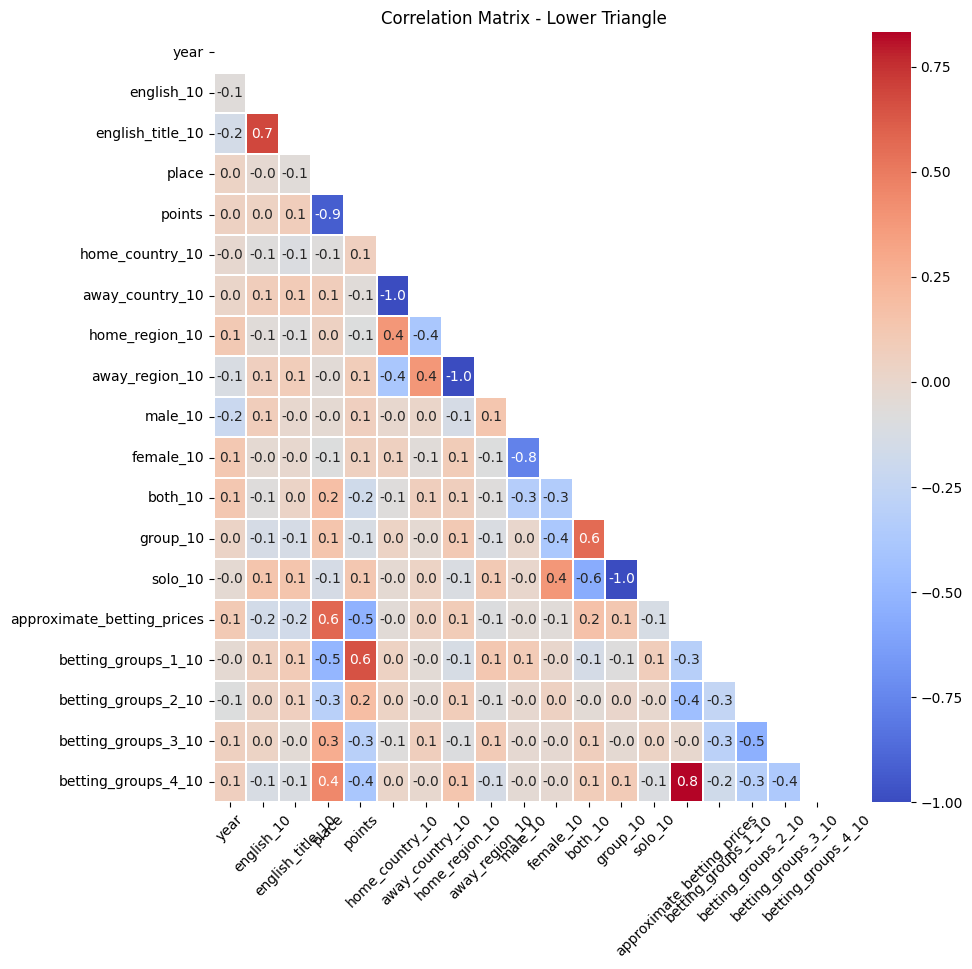

In [53]:
corr_matrix = FINAL_DATA_2004_2009_MODEL.corr()
corr_matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.2, mask=mask, ax=ax)
ax.set_title("Correlation Matrix - Lower Triangle")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<div class="alert alert-block alert-warning"style="font-size: 17px;">
    
<h4> MULTICOLINEARIY INSGHTS</h4>
--------------

* The most important feature to determine the number of points is the approximate betting prices and their dummy variables
* Then the fact of sining Both Female and Male or not also affects the target variable. 
    

</div>

In [55]:
FINAL_DATA_2004_2009_MODEL.columns

Index(['year', 'english_10', 'english_title_10', 'place', 'points',
       'home_country_10', 'away_country_10', 'home_region_10',
       'away_region_10', 'male_10', 'female_10', 'both_10', 'group_10',
       'solo_10', 'approximate_betting_prices', 'betting_groups_1_10',
       'betting_groups_2_10', 'betting_groups_3_10', 'betting_groups_4_10'],
      dtype='object')

# 06 - Modelling

<div class="alert alert-block alert-info">

**Choosing the data features:**
_____________
- The 2010 Data doesn´t have country columns, so it doesn´t make sense to include these columns in the model
- The 2010 Data has approximate betting prices, which will be the key column to predict the winner
- The reason why we only take into account data from 2004 onwards, is because we have don´t have betting prices, gender, or group/solo for data before 2004
- I though about concatting Semifinal and final data as training data but doesn´t make sense due to concat inconsistencies

**What are we predicting:**
_____________

- I realise that the model is better at predicting points than the place, so I will predict points and then sort the values. This makes sense because place is discrete whilst points isn´t so the regression models work better with continuos

**Choosing Model:**

- I will run through various regression models and choose the one with the best R2
- It seems like Randonm Forest Regressor is the winner
- The R2 is not great

 **Hyperparameter tuning:**
 
- After I have chosen the model, I need to do Hyperparameter tuning the improve the R2
    
_____________

    
</div>

In [56]:
# set variables
target_variable = ['points']
prediction_variables = ['english_10', 'english_title_10',
       'home_country_10', 'away_country_10', 'home_region_10',
       'away_region_10','male_10', 'female_10', 'both_10', 'group_10',
       'solo_10','approximate_betting_prices', 'betting_groups_1_10',
       'betting_groups_2_10', 'betting_groups_3_10', 'betting_groups_4_10']


In [57]:
Y = FINAL_DATA_2004_2009_MODEL[target_variable]
X = FINAL_DATA_2004_2009_MODEL[prediction_variables]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 10) #, random_state = 10)

Linear Regression RMSE: 59.84399206463367, R^2 Score: 0.6155132538038832
Random Forest RMSE: 57.26269680563905, R^2 Score: 0.6479666121884027
Support Vector Regressor RMSE: 95.4229755881479, R^2 Score: 0.022433814958765286
Gradient Boosting Regressor RMSE: 59.5169899447464, R^2 Score: 0.6197036319061195


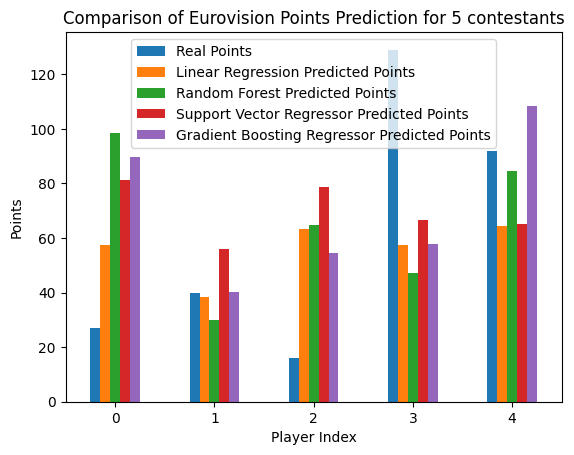

In [58]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest Model 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Support Vector Regressor Model
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_r2 = r2_score(y_test, svr_pred)

# Gradient Boosting Regressor Model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
gbr_r2 = r2_score(y_test, gbr_pred)

# XGBoost
#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
#xg_reg.fit(X_train, y_train)
#xg_pred = xg_reg.predict(X_test)
#xg_rmse = np.sqrt(mean_squared_error(y_test, xg_pred))
#xg_r2 = r2_score(y_test, xg_pred)


# Step 3: Compare Model Performance
models = ['Linear Regression', 'Random Forest', 'Support Vector Regressor', 'Gradient Boosting Regressor']
rmse_scores = [lr_rmse, rf_rmse, svr_rmse, gbr_rmse]
r2_scores = [lr_r2, rf_r2, svr_r2, gbr_r2]

for i, model in enumerate(models):
    print(f"{model} RMSE: {rmse_scores[i]}, R^2 Score: {r2_scores[i]}")

# Step 4: Plot Bar Chart for 5 Random contestants
random_contestants = X_test.sample(5, random_state=42)
players_index = random_contestants.index.tolist()

# Get real points for random players
real_points = y_test.loc[players_index]

# Get predicted points for random players from each model
lr_predicted = lr_model.predict(random_contestants)
rf_predicted= rf_model.predict(random_contestants)
svr_predicted = svr_model.predict(random_contestants)
gbr_predicted = gbr_model.predict(random_contestants)
#xg_predicted = xg_reg.predict(random_contestants)

lr_predicted= pd.Series(lr_predicted.flatten(), index=real_points.index)
rf_predicted= pd.Series(rf_predicted.flatten(), index=real_points.index)
svr_predicted= pd.Series(svr_predicted.flatten(), index=real_points.index)
gbr_predicted= pd.Series(gbr_predicted.flatten(), index=real_points.index)
#xg_pred= pd.Series(xg_pred.flatten(), index=real_points.index)

real_points_1d = real_points.values.flatten()




# Create a DataFrame to hold the results
results_df = pd.DataFrame({'Real Points': real_points_1d,
                           'Linear Regression Predicted Points': lr_predicted.values,
                           'Random Forest Predicted Points': rf_predicted.values,
                           'Support Vector Regressor Predicted Points': svr_predicted.values,
                           'Gradient Boosting Regressor Predicted Points': gbr_predicted.values})

# Plot the bar chart
results_df.plot(kind='bar', rot=0)
plt.title("Comparison of Eurovision Points Prediction for 5 contestants")
plt.xlabel("Player Index")
plt.ylabel("Points")
plt.show()


In [59]:
DATA_2010[prediction_variables]

,english_10,english_title_10,home_country_10,away_country_10,home_region_10,away_region_10,male_10,female_10,both_10,group_10,solo_10,approximate_betting_prices,betting_groups_1_10,betting_groups_2_10,betting_groups_3_10,betting_groups_4_10
0,1,1,0,1,0,1,0,0,1,1,0,94.266667,0,0,1,0
1,1,1,0,1,0,1,1,0,0,1,0,95.866667,0,0,1,0
2,1,1,0,1,0,1,1,0,0,1,0,127.666667,0,0,1,0
3,0,0,0,1,0,1,0,1,0,0,1,38.266667,0,1,0,0
4,0,0,0,1,1,0,0,1,0,1,0,128.266667,0,0,1,0
5,1,1,0,1,0,1,0,1,0,0,1,144.333333,0,0,1,0
6,0,0,0,1,0,1,1,0,0,0,1,72.266667,0,0,1,0
7,1,1,0,1,0,1,1,0,0,0,1,119.266667,0,0,1,0
8,1,0,0,1,0,1,1,0,0,0,1,229.666667,0,0,0,1
9,1,1,0,1,0,1,1,0,0,0,1,40.866667,0,1,0,0


In [60]:
# Get predicted points for random contestants from each model
# Random Forest Model 
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
rf_predicted_2010= rf_model.predict(DATA_2010[prediction_variables])


In [61]:
rf_predicted_2010

array([ 60.95,  86.13,  57.17,  73.84,  72.81,  47.31,  74.4 ,  88.71,
        49.61,  71.07,  52.19,  48.37, 116.4 ,  61.68,  53.64,  91.54,
        65.11,  63.27, 141.89, 244.34,  98.25,  57.49,  98.29, 259.43,
        30.29,  59.91,  26.31,  47.39, 107.43,  62.39,  42.05, 128.9 ,
        63.3 , 106.61, 121.64, 105.04,  49.85,  88.8 , 259.43])

In [62]:
DATA_2010[prediction_variables].shape

(39, 16)

# 07 - Hyperparameter tuning
- We have managed to get our R2 0.68!!

In [63]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10, 15],  
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model using the best hyperparameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions using the tuned model
rf_pred_tuned = best_rf_model.predict(X_test)
rf_rmse_tuned = np.sqrt(mean_squared_error(y_test, rf_pred_tuned))
rf_r2_tuned = r2_score(y_test, rf_pred_tuned)

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100}


In [64]:
rf_r2_tuned

0.6819261770374587

In [65]:
rf_pred_tuned

array([ 91.18743861,  60.62242924,  58.02372503,  62.51865642,
        46.86135757,  55.45849657, 103.7027473 ,  62.86843434,
        51.92538469, 136.60466088, 189.12393536,  91.29581043,
        52.49143772,  39.72155054,  40.94106186,  79.47915055,
       244.07044444, 203.79270473, 154.43344681,  44.9165675 ,
       265.67844444,  70.80015722])

- Predicting points for 2010

In [66]:
rf_pred_tuned_2010 = best_rf_model.predict(DATA_2010[prediction_variables])


In [67]:
rf_pred_tuned_2010

array([ 58.21580836,  65.24850825,  59.35995794,  92.43117239,
        63.938576  ,  46.44214384,  64.25611188,  65.00934422,
        46.66198497,  86.88331362,  61.4150926 ,  62.69526415,
       117.54482144,  52.19095761,  51.15655129,  83.91809132,
        59.55238736,  58.79908904, 134.97098139, 237.30225183,
       107.29270701,  53.00966493, 111.63938749, 257.62761111,
        46.86135757,  52.9191719 ,  44.84031268,  45.93621738,
       111.9519102 ,  56.19269523,  53.4335401 , 129.5430077 ,
        54.0887365 , 105.95448392, 105.5493322 , 108.28598176,
        59.13634668,  76.96586059, 257.62761111])

In [68]:
Points_2010_tuned= [58.21580836,  65.24850825,  59.35995794,  92.43117239,
        63.938576  ,  46.44214384,  64.25611188,  65.00934422,
        46.66198497,  86.88331362,  61.4150926 ,  62.69526415,
       117.54482144,  52.19095761,  51.15655129,  83.91809132,
        59.55238736,  58.79908904, 134.97098139, 237.30225183,
       107.29270701,  53.00966493, 111.63938749, 257.62761111,
        46.86135757,  52.9191719 ,  44.84031268,  45.93621738,
       111.9519102 ,  56.19269523,  53.4335401 , 129.5430077 ,
        54.0887365 , 105.95448392, 105.5493322 , 108.28598176,
        59.13634668,  76.96586059, 257.62761111]

In [102]:
DATA_2010_copy = DATA_2010.copy()
DATA_2010_copy.tail(5)

,year,country,region,song_language,artist,song,english_translation,artist_gender,group/solo,place,points,host_country,host_region,home/away_country,home/away_region,approximate_betting_prices,english_10,english_title_10,betting_groups,betting_groups_1_10,betting_groups_2_10,betting_groups_3_10,betting_groups_4_10,home_country_10,away_country_10,home_region_10,away_region_10,male_10,female_10,both_10,group_10,solo_10
34,2010,Spain,Western Europe,Spanish,Daniel Diges,"""Algo pequeñito""",Something tiny,Male,Solo,NaN,NaN,Norway,Scandinavia,Away,Away,53.533333,0,0,3. 51-150,0,0,1,0,0,1,0,1,1,0,0,0,1
35,2010,Norway,Scandinavia,English,Didrik Solli-Tangen,"""My Heart Is Yours""",—,Male,Solo,NaN,NaN,Norway,Scandinavia,Home,Home,14.306667,1,1,2. 11-50,0,1,0,0,1,0,1,0,1,0,0,0,1
36,2010,United Kingdom,Independent,English,Josh Dubovie,"""That Sounds Good to Me""",—,Male,Solo,NaN,NaN,Norway,Scandinavia,Away,Away,108.466667,1,1,3. 51-150,0,0,1,0,0,1,0,1,1,0,0,0,1
37,2010,France,Western Europe,French,Jessy Matador,"""Allez Ola Olé""",Come on Ola Olé,Male,Solo,NaN,NaN,Norway,Scandinavia,Away,Away,56.200000,0,0,3. 51-150,0,0,1,0,0,1,0,1,1,0,0,0,1
38,2010,Germany,Western Europe,English,Lena Meyer-Landrut,"""Satellite""",—,Female,Solo,NaN,NaN,Norway,Scandinavia,Away,Away,3.249778,1,1,1. 1-10,1,0,0,0,0,1,0,1,0,1,0,0,1


In [96]:
DATA_2010_copy["points"]= Points_2010_tuned
DATA_2010_copy['place_rank'] = DATA_2010_copy['points'].rank(ascending=False, method='min').astype(int)
SORTED_2010 = DATA_2010_copy.sort_values(by=['points', 'approximate_betting_prices'], ascending=[False, True])


In [103]:
SORTED_2010['betting_rank'] = SORTED_2010['approximate_betting_prices'].rank(method='min')
SORTED_2010.tail(5)

,year,country,region,song_language,artist,song,english_translation,artist_gender,group/solo,place,points,host_country,host_region,home/away_country,home/away_region,approximate_betting_prices,english_10,english_title_10,betting_groups,betting_groups_1_10,betting_groups_2_10,betting_groups_3_10,betting_groups_4_10,home_country_10,away_country_10,home_region_10,away_region_10,male_10,female_10,both_10,group_10,solo_10,place_rank,betting_rank
24,2010,Ukraine,Former Socialist Bloc,English,Alyosha,"""Sweet People""",—,Female,Solo,NaN,46.861358,Norway,Scandinavia,Away,Away,66.666667,1,1,3. 51-150,0,0,1,0,0,1,0,1,0,1,0,0,1,35,18.0
8,2010,Poland,Former Socialist Bloc,"English, Polish",Marcin Mroziński,"""Legenda""",The legend,Male,Solo,NaN,46.661985,Norway,Scandinavia,Away,Away,229.666667,1,0,4. 150+,0,0,0,1,0,1,0,1,1,0,0,0,1,36,37.0
5,2010,Latvia,Former Socialist Bloc,English,Aisha,"""What For?""",—,Female,Solo,NaN,46.442144,Norway,Scandinavia,Away,Away,144.333333,1,1,3. 51-150,0,0,1,0,0,1,0,1,0,1,0,0,1,37,32.0
27,2010,Slovenia,Former Yugoslavia,Slovene,Ansambel Roka Žlindre and Kalamari,"""Narodnozabavni rock""",Folk rock,Both,Group,NaN,45.936217,Norway,Scandinavia,Away,Away,234.266667,0,0,4. 150+,0,0,0,1,0,1,0,1,0,0,1,1,0,38,38.0
26,2010,Romania,Former Socialist Bloc,English,Paula Seling and Ovi,"""Playing with Fire""",—,Both,Group,NaN,44.840313,Norway,Scandinavia,Away,Away,72.466667,1,1,3. 51-150,0,0,1,0,0,1,0,1,0,0,1,1,0,39,21.0


In [98]:
FIND_BY_PLACE = SORTED_2010[SORTED_2010['place_rank'].isin([3])]
FIND_BY_PLACE

,year,country,region,song_language,artist,song,english_translation,artist_gender,group/solo,place,points,host_country,host_region,home/away_country,home/away_region,approximate_betting_prices,english_10,english_title_10,betting_groups,betting_groups_1_10,betting_groups_2_10,betting_groups_3_10,betting_groups_4_10,home_country_10,away_country_10,home_region_10,away_region_10,male_10,female_10,both_10,group_10,solo_10,place_rank,betting_rank
19,2010,Israel,Independent,Hebrew,Harel Skaat,"""Milim""",Words,Male,Solo,NaN,237.302252,Norway,Scandinavia,Away,Away,6.566667,0,0,1. 1-10,1,0,0,0,0,1,0,1,1,0,0,0,1,3,3.0


In [99]:
def get_position_for_country():
    try:
        country_input= input("Enter the country you want to predict")
        position = FIND_BY_PLACE.loc[FIND_BY_PLACE['country'] == country_input, 'place_rank'].values[0]
        return f"The position of {country_input} is: {position}"
    except IndexError:
        return f"Country '{country_input}' not found or data is missing for this country."

    

In [100]:
get_position_for_country()



Enter the country you want to predict Israel


'The position of Israel is: 3'

<div class="alert alert-block alert-success">

THE WINNER IS GERMANY</div>

# 07 - Summary and Conclusions

<div class="alert alert-block alert-info">
    
**DATA CONCLUSIONS:**

* The model would probably be much more accurate if we had more data and more relevant features, for example being able to segment by public and jury points as well as televoting score and Poll scores
* The empty data in approximate betting prices in previous years as well as empty data on artist/gender and Group/solo in Semifinal could have helped to better train model
    
____________

**BASIC CONCLUSIONS ON SEMIFINAL DATA** 
* The Contest is mostly held in Former Socialist Bloc. Serbia and Russia being the ones that host the most
* The word that appears most in the Semifinals song titles is Love
* All countries perform in Away country.
* Love,Dream, Dance,Life are some of the most repeated words in the semifinals song titles
* Some countries  perform in Home region but most in Away region.
* Most songs at least contain English
* Most Song titles are in English
* Betting groups are  distributed increasingly , with the least value counts in the group 1-10
* In previous years it wan´t made in Former Socialistit region as much as in 2009
* Over the years, singers have been singing increasingly more in English, however there is not such a direct insight with the song title

_____________
**BASIC CONCLUSIONS ON FINAL DATA** 

* The Contest is mostly held in Former Socialist Bloc. Then Western Europe. The order of Host countries is Serbia first, then Russia, then Finland
* Most songs are in English or contain English
* Again, the word that appears most in the finals song titles is Love
* Compared to the Semifinals, some contestants perform in the finals in their Home/Country
* Most of the singers are female and the least are both (male and female)
* Most of the song titles appear in English
* More singers perform solo (84 solo, 38 Group)
* 118 countries perform in Away country. 4 perform in Home country and 21 perform in Home Region
* In 2004 and earlier years there were more Male singers and the other way around for Female."Both" has increased over the years

**WHAT FEATURES AFFECT THE NUMBER OF POINTS IN SEMIFINAL**

--------------

* People that perform Away in the region get more points in Semifinal. Interesting
* In Semifinals, the language is not that deterministic of points

**WHAT FEATURES AFFECT THE NUMBER OF POINTS IN FINAL**

--------------

* Contestants that are both Male and Female are less likely to win in the final
* Female and Male are not that dependent on target variable
* Performing Home in the final country is correlated to winning more points
* Performing Away in the final region is correlated to winning more points
* Singing an English Song or having an English title as the song gets more points
* Performing solo in the final is more correlated to having more points

**WHAT FEATURES AFFECT THE NUMBER OF POINTS IN FINAL COMPARED TO SEMIFINAL**
 * Singing in English is more important in the finals than in the Semifinal
* In the Finals, singing as a Both Male and Female is penalised more than in the Semifinal
* As we can see in the Scatterplot, the points in the final and the points in the Semifinals are correlated, even though there can be exceptions

</div>

## MODELLING SUMMARY

<div class="alert alert-block alert-info">
    
**MULTICOLINEARITY AND CORRELATION WITH TARGET VARIABLE**

* The most important feature to determine the number of points is the approximate betting prices and their dummy variables( 0.5 multicolinearity)
* Then the fact of sining Both Female and Male or not also affects the target variable, but not much (multicolinearity of (0.1-0.2)

**Choosing the data features:**
_____________
- The 2010 Data doesn´t have country columns, so it doesn´t make sense to include these columns in the model
- The 2010 Data has approximate betting prices, which will be the key column to predict the winner
- The reason why we only take into account data from 2004 onwards, is because we have don´t have betting prices, gender, or group/solo for data before 2004
- I though about concatting Semifinal and final data as training data but doesn´t make sense due to concat inconsistencies

**What are we predicting:**
_____________

- I realise that the model is better at predicting points than the place, so I will predict points and then sort the values. This makes sense because place is discrete whilst points isn´t so the regression models work better with continuos

**Choosing Model:**

- I will run through various regression models and choose the one with the best R2
- It seems like Randonm Forest Regressor is the winner
- Random Forest regressor is a good choice because it can  handle non-linear relationships like male, female, group etc and it is robust to overfitting and also because of its ensemble nature
- The R2 of 0.68 is fairly OK taking into account the limited data we have

 **Hyperparameter tuning:**
 
- After I have chosen the model, I need to do Hyperparameter tuning the improve the R2


</div>

## RESULT 2010

<div class="alert alert-block alert-success">

LEADERBOARD

1.Germany

2.Azerbaijan

3.Israel

4.Armenia

5.Croatia</div>

# Comment on result

- The main driver of prediction seems to be the approximate betting price
- Gender, and Group Solo don´t affect as much as I previously analysed and neither does the language
- Because most of the values in Home/away/Country are Away, these columns doesn´t weigh as much

*Improvements*
- I would have also liked to normalise the number of points of number of countries
- Do further bucketing and further encoding
- Create a function, that in case there is a tie in points, then base it on betting_prices_rank
  
  